# Project on Invoice Management Application

## Mounting our Drive

In [ ]:
# We can mount our drive so that we can use the dataset from our drive itself
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Installing dependencies of forex-python for currency exchange
# !pip install forex-python

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# to display max_columns
pd. set_option('display.max_columns',4500) # or 1000.
pd. set_option('display.max_rows', 4500) # or 1000.

## Business Problem
1. In the ideal world, the buyer business should payback within the stipulated time (ie the
Payment Term). However, in the real world, the buyer business seldom pays within their
established time frame, and this is where the Account receivables Department comes
into picture.
2. Every business consists of a dedicated Account receivables Department to collect and
track payment of invoices.
3. It consists of a Account receivables team that is responsible for:
* Collecting payments from customers for their past due invoices
* Sending reminders and follow ups to the customers for payments to be made
* Looking after the entire process of getting the cash inflow
* Help the company get paid for the services and products supplied.

## Objective
 Here We need to build a Machine Learning model that would predict the payment date of an invoice when it gets created in the system.

## Link to the Dataset
https://drive.google.com/file/d/1W_kiYJAQwWM_3eqcaaNXHrz7D5xAjbxM/view?usp=sharing
<br>Currently this link can be accessed with permission only.

## Attribute Description
1. business_code      : company code of the account
2. cust_number        : customer number given to all the customers of the Account
3. name_customer      : name of the customer.
4. clear_date         : The date on which the customer clears an invoice, or in simple terms, they
make the full payment.
5. buisness_year      : the year in which invoice was created
6. doc_id             : It is also an unique identifier of an invoice is a primary key for acct_doc_header table
7. posting_date            : When the order is shipped to the customer, as per invoice
8. document_create_date    : The date on which the document was created
9. document_create_date.1  : Normalised date of the invoice document
10. due_in_date            : The date on which the customer is expected to clear an invoice
11. invoice_currency        : The currency of the invoice amount in the document for the invoice
12. document type           : It represents the type of document. eg D1 represents Invoice
13. posting_id              : key indicator to identify whether an AR item is invoice, deduction, credit memo based on its value. Apllicable for SAP ERP
14. area_business            :Business area in sap is defined as an organisationalarea within the financial accounting module.
15. total_open_amount        : The amount that is yet to be paid for that invoice
16. baseline_create_date     : The date on which the Invoice was created.
17. cust_payment_terms       :Business terms and agreements between customers and accounts on discounts and days of payment
18. invoice_id               : Unique number assigned when a seller creates an Invoice.
19. isOpen                   : indicator of whether an invoice is open or closed. isopen = 1, means the invoice is open.

## Reading the Dataset

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Highradius/H2HBABBA1747.csv")
data.head()

business_code cust_number name_customer           clear_date  buisness_year  \
0          U001  0200418007           AM   2019-08-22 00:00:00         2019.0   
1          U001  0200761734    H E BUT us                  NaN         2020.0   
2          U001  0200875006   KROGER corp  2019-01-28 00:00:00         2019.0   
3          U001  0200769623    WAL-MAR us  2019-01-25 00:00:00         2019.0   
4          U001      CCCA02     KRAFT  us  2019-08-02 00:00:00         2019.0   

         doc_id posting_date  document_create_date  document_create_date.1  \
0  1.929687e+09   2019-08-07              20190803                20190807   
1  1.930652e+09   2020-03-14              20200314                20200314   
2  1.928618e+09   2019-01-13              20190113                20190113   
3  1.928590e+09   2019-01-09              20190108                20190109   
4  1.929554e+09   2019-06-29              20190627                20190629   

   due_in_date invoice_currency document type  posting_id  area_business  \
0   20190822.0              USD            RV         1.0            NaN   
1   20200329.0              USD            RV         1.0            NaN   
2   20190128.0              USD            RV         1.0            NaN   
3   20190124.0              USD            RV         1.0            NaN   
4   20190803.0              USD            RV         1.0            NaN   

   total_open_amount  baseline_create_date cust_payment_terms    invoice_id  \
0            4007.80            20190807.0               NAA8  1.929687e+09   
1           48209.32            20200314.0               NAA8  1.930652e+09   
2           98259.92            20190113.0               NAA8  1.928618e+09   
3           32307.87            20190109.0               NAH4  1.928590e+09   
4           11053.44            20190629.0               NAG2  1.929554e+09   

   isOpen  
0       0  
1       1  
2       0  
3       0  
4       0

### Inspecting the Data

In [ ]:
data.tail()

business_code cust_number         name_customer           clear_date  \
49995          U001  0200592182              DECA llc  2019-08-08 00:00:00   
49996          U001  0200772670           ASSOCIAT us  2019-04-09 00:00:00   
49997          U001  0100052284  TREASURE corporation  2019-06-29 00:00:00   
49998          U001  0200769623            WAL-MAR in  2020-01-15 00:00:00   
49999          U001  0200762950                HAR co  2019-05-08 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
49995         2019.0  1.929711e+09   2019-08-06              20190806   
49996         2019.0  1.929036e+09   2019-03-26              20190327   
49997         2019.0  1.929514e+09   2019-06-18              20190618   
49998         2020.0  1.930336e+09   2020-01-01              20191231   
49999         2019.0  1.929192e+09   2019-04-23              20190423   

       document_create_date.1  due_in_date invoice_currency document type  \
49995                20190806   20190808.0              USD            RV   
49996                20190326   20190410.0              USD            RV   
49997                20190618   20190703.0              USD            RV   
49998                20200101   20200116.0              USD            RV   
49999                20190423   20190508.0              USD            RV   

       posting_id  area_business  total_open_amount  baseline_create_date  \
49995         1.0            NaN           17962.03            20190801.0   
49996         1.0            NaN            1441.10            20190326.0   
49997         1.0            NaN            2046.80            20190618.0   
49998         1.0            NaN             834.42            20200101.0   
49999         1.0            NaN           46800.23            20190423.0   

      cust_payment_terms    invoice_id  isOpen  
49995               NAM1  1.929711e+09       0  
49996               NAU5  1.929036e+09       0  
49997               NAA8  1.929514e+09       0  
49998               NAH4  1.930336e+09       0  
49999               NAA8  1.929192e+09       0

In [ ]:
data.count()

business_code             50000
cust_number               50000
name_customer             50000
clear_date                40000
buisness_year             50000
doc_id                    50000
posting_date              50000
document_create_date      50000
document_create_date.1    50000
due_in_date               50000
invoice_currency          50000
document type             50000
posting_id                50000
area_business                 0
total_open_amount         50000
baseline_create_date      50000
cust_payment_terms        50000
invoice_id                49997
isOpen                    50000
dtype: int64

We can observe that there are about 50000 values for each column except the are_business and invoice_id.

In [ ]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [ ]:
# Using Describe to better understand the count,max and min values in our data
data.describe()

buisness_year        doc_id  document_create_date  \
count   50000.000000  5.000000e+04          5.000000e+04   
mean     2019.305280  2.010760e+09          2.019351e+07   
std         0.460531  2.809036e+08          4.492723e+03   
min      2019.000000  1.928511e+09          2.018123e+07   
25%      2019.000000  1.929342e+09          2.019051e+07   
50%      2019.000000  1.929959e+09          2.019091e+07   
75%      2020.000000  1.930620e+09          2.020013e+07   
max      2020.000000  9.500000e+09          2.020052e+07   

       document_create_date.1   due_in_date  posting_id  area_business  \
count            5.000000e+04  5.000000e+04     50000.0            0.0   
mean             2.019353e+07  2.019368e+07         1.0            NaN   
std              4.476775e+03  4.469050e+03         0.0            NaN   
min              2.018123e+07  2.018122e+07         1.0            NaN   
25%              2.019051e+07  2.019052e+07         1.0            NaN   
50%              2.019091e+07  2.019093e+07         1.0            NaN   
75%              2.020013e+07  2.020022e+07         1.0            NaN   
max              2.020052e+07  2.020071e+07         1.0            NaN   

       total_open_amount  baseline_create_date    invoice_id        isOpen  
count       5.000000e+04          5.000000e+04  4.999700e+04  50000.000000  
mean        3.175522e+04          2.019353e+07  2.010311e+09      0.200000  
std         3.897598e+04          4.476505e+03  2.748559e+08      0.400004  
min         1.200000e-01          2.018121e+07  1.928511e+09      0.000000  
25%         4.721442e+03          2.019051e+07  1.929342e+09      0.000000  
50%         1.728057e+04          2.019091e+07  1.929959e+09      0.000000  
75%         4.593837e+04          2.020013e+07  1.930620e+09      0.000000  
max         1.134400e+06          2.020052e+07  2.960635e+09      1.000000

In [ ]:
# To know about all the different types of data present in our dataset
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

### Separating the test data 
This is the test data with no clear_date

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data['isOpen'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
area_business           50000  1.00000
clear_date              10000  0.20000
invoice_id                  3  0.00006
isOpen                      0  0.00000
document_create_date        0  0.00000
cust_number                 0  0.00000
name_customer               0  0.00000
buisness_year               0  0.00000
doc_id                      0  0.00000
posting_date                0  0.00000
due_in_date                 0  0.00000
document_create_date.1      0  0.00000
invoice_currency            0  0.00000
document type               0  0.00000
posting_id                  0  0.00000
total_open_amount           0  0.00000
baseline_create_date        0  0.00000
cust_payment_terms          0  0.00000
business_code               0  0.00000

Now we can see that we have about 10000 values missing.<br>
So we can keep these rows separate as the test set of data. so that we can keep this for prediction on deployment stage.


<b>Dropping area_business_column as it has only null values</b><br>
First of all we can observe that there are all the values missing in the column of area_business so we can drop this column

In [ ]:
data=data.drop('area_business',axis=1)

In [ ]:
test_data=data[data['clear_date'].isnull()]    # This is our untouched test data
data=data.dropna(subset=['clear_date'],axis=0)   # This is our left over data for training
data.isnull().sum().sort_values(ascending=False)

invoice_id                3
isOpen                    0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
business_code             0
dtype: int64

In [ ]:
data.shape

(40000, 18)

In [ ]:

data.head()

business_code cust_number name_customer           clear_date  buisness_year  \
0          U001  0200418007           AM   2019-08-22 00:00:00         2019.0   
2          U001  0200875006   KROGER corp  2019-01-28 00:00:00         2019.0   
3          U001  0200769623    WAL-MAR us  2019-01-25 00:00:00         2019.0   
4          U001      CCCA02     KRAFT  us  2019-08-02 00:00:00         2019.0   
5          U001   200035911     MBM trust  2019-07-18 00:00:00         2019.0   

         doc_id posting_date  document_create_date  document_create_date.1  \
0  1.929687e+09   2019-08-07              20190803                20190807   
2  1.928618e+09   2019-01-13              20190113                20190113   
3  1.928590e+09   2019-01-09              20190108                20190109   
4  1.929554e+09   2019-06-29              20190627                20190629   
5  1.929559e+09   2019-07-02              20190630                20190702   

   due_in_date invoice_currency document type  posting_id  total_open_amount  \
0   20190822.0              USD            RV         1.0            4007.80   
2   20190128.0              USD            RV         1.0           98259.92   
3   20190124.0              USD            RV         1.0           32307.87   
4   20190803.0              USD            RV         1.0           11053.44   
5   20190717.0              USD            RV         1.0           16066.99   

   baseline_create_date cust_payment_terms    invoice_id  isOpen  
0            20190807.0               NAA8  1.929687e+09       0  
2            20190113.0               NAA8  1.928618e+09       0  
3            20190109.0               NAH4  1.928590e+09       0  
4            20190629.0               NAG2  1.929554e+09       0  
5            20190702.0               NAA8  1.929559e+09       0

Now we will look into the invoice_id, We can remove the three rows in our data where we have our invoice_id value missing.

In [ ]:
# Looking after the null values in the invoice_id column

# creating bool series True for NaN values 
bool_series = pd.isnull(data["invoice_id"]) 
    
# filtering data 
# displaying data only with Gender = NaN 
data[bool_series] 

business_code cust_number   name_customer           clear_date  \
18852          CA02  0140106054     TREE  trust  2019-05-31 00:00:00   
27226          CA02  0140106054       TREE  llc  2019-05-22 00:00:00   
42914          CA02  0140104225  SAVE-ON- trust  2019-12-27 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
18852         2019.0  9.500000e+09   2019-03-29              20190329   
27226         2019.0  9.500000e+09   2019-03-29              20190329   
42914         2019.0  9.500000e+09   2019-03-29              20190329   

       document_create_date.1  due_in_date invoice_currency document type  \
18852                20190307   20190317.0              CAD            X2   
27226                20190301   20190311.0              CAD            X2   
42914                20190320   20190330.0              CAD            X2   

       posting_id  total_open_amount  baseline_create_date cust_payment_terms  \
18852         1.0            1751.14            20190307.0               CA10   
27226         1.0           21245.76            20190301.0               CA10   
42914         1.0            6636.96            20190320.0               CA10   

       invoice_id  isOpen  
18852         NaN       0  
27226         NaN       0  
42914         NaN       0

<b> Here we can observe that the invoice_id is missing only for those columns where we have our invoice closed that is isopen=0. So now we can remove these three rows from our data.

In [ ]:
data=data.dropna(subset=['invoice_id'],axis=0)
data.isnull().sum().sort_values(ascending=False)

isOpen                    0
invoice_id                0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
business_code             0
dtype: int64

<b> We can observe that the rows with null values in the invoice_id column are removed.

In [ ]:
data=data.reset_index(drop=True)
data.head()

business_code cust_number name_customer           clear_date  buisness_year  \
0          U001  0200418007           AM   2019-08-22 00:00:00         2019.0   
1          U001  0200875006   KROGER corp  2019-01-28 00:00:00         2019.0   
2          U001  0200769623    WAL-MAR us  2019-01-25 00:00:00         2019.0   
3          U001      CCCA02     KRAFT  us  2019-08-02 00:00:00         2019.0   
4          U001   200035911     MBM trust  2019-07-18 00:00:00         2019.0   

         doc_id posting_date  document_create_date  document_create_date.1  \
0  1.929687e+09   2019-08-07              20190803                20190807   
1  1.928618e+09   2019-01-13              20190113                20190113   
2  1.928590e+09   2019-01-09              20190108                20190109   
3  1.929554e+09   2019-06-29              20190627                20190629   
4  1.929559e+09   2019-07-02              20190630                20190702   

   due_in_date invoice_currency document type  posting_id  total_open_amount  \
0   20190822.0              USD            RV         1.0            4007.80   
1   20190128.0              USD            RV         1.0           98259.92   
2   20190124.0              USD            RV         1.0           32307.87   
3   20190803.0              USD            RV         1.0           11053.44   
4   20190717.0              USD            RV         1.0           16066.99   

   baseline_create_date cust_payment_terms    invoice_id  isOpen  
0            20190807.0               NAA8  1.929687e+09       0  
1            20190113.0               NAA8  1.928618e+09       0  
2            20190109.0               NAH4  1.928590e+09       0  
3            20190629.0               NAG2  1.929554e+09       0  
4            20190702.0               NAA8  1.929559e+09       0

## Extracting the duplicate rows and removing them

In [ ]:
print("duplicated rows are ",data.duplicated().sum())
print("non-duplicated rows are",(~data.duplicated()).sum())

duplicated rows are  897
non-duplicated rows are 39100


In [ ]:
data.loc[data.duplicated(keep='last'), :]

business_code cust_number         name_customer           clear_date  \
5              U001  0200729290        KROGER systems  2019-12-23 00:00:00   
18             CA02  0140105847        GORDON F trust  2019-11-04 00:00:00   
24             U001  0200721222                GO llc  2019-09-25 00:00:00   
37             U013  0140103409            BUTTE corp  2019-10-11 00:00:00   
41             U001  0200769623              WAL-MAR   2019-04-05 00:00:00   
49             U001  0200778355        US  foundation  2019-11-15 00:00:00   
60             U001  0200762301            C&S WH llc  2019-11-04 00:00:00   
62             U001  0200769623              WAL-MAR   2019-04-11 00:00:00   
67             U001  0200769623       WAL-MAR systems  2020-01-28 00:00:00   
103            U001  0200721222                   GO   2020-01-24 00:00:00   
118            U001  0200726979              BJ'S  in  2019-02-15 00:00:00   
124            U001  0200704045               RA corp  2019-12-02 00:00:00   
129            U001   200978899     MBM/PF foundation  2019-03-19 00:00:00   
199            U001  0200762301          C&S WH trust  2019-05-31 00:00:00   
201            U001  0200769623            WAL-MAR co  2019-02-05 00:00:00   
207            U001  0200458131             TIMES llc  2019-06-26 00:00:00   
219            U001  0200794332          COST systems  2019-07-22 00:00:00   
222            U001  0200707822              PUBLI us  2019-08-12 00:00:00   
225            CA02  0140104409       LOB corporation  2019-12-27 00:00:00   
242            U001  0200769623    WAL-MAR foundation  2020-03-04 00:00:00   
261            U001  0200416837                  DEC   2019-11-08 00:00:00   
265            U013  0100043965           THE SQUA us  2019-08-08 00:00:00   
272            U001  0200799367        MCL foundation  2019-01-28 00:00:00   
283            CA02  0140106408      WAL-M foundation  2019-10-01 00:00:00   
311            U001  0200714710             SYSCO  us  2019-09-19 00:00:00   
332            U001  0200714710             SYSCO  us  2019-10-08 00:00:00   
333            U001  0200758883     PERFOR associates  2019-08-05 00:00:00   
335            CA02  0140104409             LOB trust  2019-10-11 00:00:00   
344            U001  0200744019       TARG foundation  2019-12-26 00:00:00   
352            U001  0200886415     COSTCO foundation  2020-02-21 00:00:00   
385            U001  0200769623          WAL-MAR corp  2019-11-15 00:00:00   
404            U001  0200755701             ASSOCI co  2019-05-07 00:00:00   
422            U001  0100017545     PERFOR foundation  2020-01-30 00:00:00   
461            U001  0200772670           ASSOCIAT in  2019-08-02 00:00:00   
462            U001  0200646464    CUSTOMI foundation  2020-02-28 00:00:00   
544            U001  0200769623   WAL-MAR corporation  2019-03-11 00:00:00   
548            U001      CCU013   KRAFT F corporation  2020-02-28 00:00:00   
562            U001  0200769623          WAL-MAR corp  2019-10-15 00:00:00   
578            CA02  0140105686              SYSC llc  2019-12-30 00:00:00   
595            U001  0200418007               AM corp  2019-10-21 00:00:00   
669            U001  0200705742        DOT foundation  2019-11-20 00:00:00   
716            CA02  0140105686      SYSC corporation  2019-11-07 00:00:00   
719            U001  0100043921              NASS llc  2019-06-21 00:00:00   
763            U001  0200936373            SUPE trust  2019-02-19 00:00:00   
812            CA02  0140104225        SAVE-ON- trust  2019-12-16 00:00:00   
821            U001  0200020431             DEC trust  2020-03-02 00:00:00   
822            U001  0200762301           C&S WH corp  2019-06-13 00:00:00   
826            U001  0200769623            WAL-MAR co  2019-11-21 00:00:00   
833            U001  0200769623              WAL-MAR   2019-05-28 00:00:00   
851            U001  0200782669      SYGMA foundation  2019-12-13 00:00:00   
859            U001  0200790

We can observe that all these 897 rows are duplicated.

In [ ]:
data.drop_duplicates(inplace=True,keep='last')
data.shape

(39100, 18)

### Train-Test split of Data
Since Datetime plays a vital role in our dataset so we can split the data by first sorting the data depending on the date and then splitting the data for train, test and validation.

#### Sorting the data by posting_date
We are performing the sorting so that We can order our data as Time-Series data. So that the training can be done on the past data and the testing can be done on the future data which would likely help us in productionization of our model on the future unseen data.

In [ ]:
data=data.sort_values(by = 'posting_date')
data=data.reset_index(drop=True)
data.head()

business_code cust_number name_customer           clear_date  buisness_year  \
0          U001  0200769623   WAL-MAR llc  2019-01-17 00:00:00         2019.0   
1          U001  0200759878           SA   2019-01-22 00:00:00         2019.0   
2          U001  0200726979      BJ'S  us  2019-01-15 00:00:00         2019.0   
3          U001  0200148860    DOLLA corp  2019-01-14 00:00:00         2019.0   
4          U001  0200769623    WAL-MAR in  2019-01-10 00:00:00         2019.0   

         doc_id posting_date  document_create_date  document_create_date.1  \
0  1.928543e+09   2018-12-30              20181230                20181230   
1  1.928544e+09   2018-12-30              20181230                20181230   
2  1.928542e+09   2018-12-30              20181229                20181230   
3  1.928540e+09   2018-12-30              20181229                20181230   
4  1.928544e+09   2018-12-30              20181230                20181230   

   due_in_date invoice_currency document type  posting_id  total_open_amount  \
0   20190114.0              USD            RV         1.0           11475.96   
1   20190114.0              USD            RV         1.0           36053.19   
2   20190114.0              USD            RV         1.0             152.79   
3   20190114.0              USD            RV         1.0           17507.51   
4   20190114.0              USD            RV         1.0           41309.00   

   baseline_create_date cust_payment_terms    invoice_id  isOpen  
0            20181230.0               NAH4  1.928543e+09       0  
1            20181230.0               NAH4  1.928544e+09       0  
2            20181230.0               NAA8  1.928542e+09       0  
3            20181230.0               NAA8  1.928540e+09       0  
4            20181230.0               NAH4  1.928544e+09       0

In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#### splitting the data

In [ ]:
X_train, X_inter_test = train_test_split(data,test_size=.20,shuffle=False)
X_cv, X_test = train_test_split(X_inter_test,test_size=.50,shuffle=False)
X_train.shape,X_cv.shape,X_test.shape

((31280, 18), (3910, 18), (3910, 18))

### Creating the target column delay on train data
* Here we have the clear_date and due_date column so we can find the delay of payment by subtracting these two dates. 
* It is always good to have the clear_date before or close to due_date because due_date is the time by which the customer has to make his payment and clear_date is the time by which he has completely made his payment. 
* So we should expect the clear_date to be as close as possible to due_date without any delay.

 Handling clear_date and due_in_date to create the delay column

In [ ]:
X_train['clear_date']=pd.to_datetime(X_train['clear_date'])
X_train['due_in_date'] = pd.to_datetime(X_train['due_in_date'], format='%Y%m%d')

In [ ]:
X_train['delay']=X_train['due_in_date']-X_train['clear_date']
X_train['delay'] = pd.to_numeric(X_train['delay'].dt.days, downcast='integer')
X_train.head()

business_code cust_number name_customer clear_date  buisness_year  \
0          U001  0200769623   WAL-MAR llc 2019-01-17         2019.0   
1          U001  0200759878           SA  2019-01-22         2019.0   
2          U001  0200726979      BJ'S  us 2019-01-15         2019.0   
3          U001  0200148860    DOLLA corp 2019-01-14         2019.0   
4          U001  0200769623    WAL-MAR in 2019-01-10         2019.0   

         doc_id posting_date  document_create_date  document_create_date.1  \
0  1.928543e+09   2018-12-30              20181230                20181230   
1  1.928544e+09   2018-12-30              20181230                20181230   
2  1.928542e+09   2018-12-30              20181229                20181230   
3  1.928540e+09   2018-12-30              20181229                20181230   
4  1.928544e+09   2018-12-30              20181230                20181230   

  due_in_date invoice_currency document type  posting_id  total_open_amount  \
0  2019-01-14              USD            RV         1.0           11475.96   
1  2019-01-14              USD            RV         1.0           36053.19   
2  2019-01-14              USD            RV         1.0             152.79   
3  2019-01-14              USD            RV         1.0           17507.51   
4  2019-01-14              USD            RV         1.0           41309.00   

   baseline_create_date cust_payment_terms    invoice_id  isOpen  delay  
0            20181230.0               NAH4  1.928543e+09       0     -3  
1            20181230.0               NAH4  1.928544e+09       0     -8  
2            20181230.0               NAA8  1.928542e+09       0     -1  
3            20181230.0               NAA8  1.928540e+09       0      0  
4            20181230.0               NAH4  1.928544e+09       0      4

From this we can observe that if there is a negative value in the delay column then the payment is delayed by that many days.<br>
If there is a positive value then the payment is done earlier before the due date.

### Basic Preprocessing on Train Data

In [ ]:
# First of all reset the index of X_train data
X_train=X_train.reset_index(drop=True)
X_train.head()

business_code cust_number name_customer clear_date  buisness_year  \
0          U001  0200769623   WAL-MAR llc 2019-01-17         2019.0   
1          U001  0200759878           SA  2019-01-22         2019.0   
2          U001  0200726979      BJ'S  us 2019-01-15         2019.0   
3          U001  0200148860    DOLLA corp 2019-01-14         2019.0   
4          U001  0200769623    WAL-MAR in 2019-01-10         2019.0   

         doc_id posting_date  document_create_date  document_create_date.1  \
0  1.928543e+09   2018-12-30              20181230                20181230   
1  1.928544e+09   2018-12-30              20181230                20181230   
2  1.928542e+09   2018-12-30              20181229                20181230   
3  1.928540e+09   2018-12-30              20181229                20181230   
4  1.928544e+09   2018-12-30              20181230                20181230   

  due_in_date invoice_currency document type  posting_id  total_open_amount  \
0  2019-01-14              USD            RV         1.0           11475.96   
1  2019-01-14              USD            RV         1.0           36053.19   
2  2019-01-14              USD            RV         1.0             152.79   
3  2019-01-14              USD            RV         1.0           17507.51   
4  2019-01-14              USD            RV         1.0           41309.00   

   baseline_create_date cust_payment_terms    invoice_id  isOpen  delay  
0            20181230.0               NAH4  1.928543e+09       0     -3  
1            20181230.0               NAH4  1.928544e+09       0     -8  
2            20181230.0               NAA8  1.928542e+09       0     -1  
3            20181230.0               NAA8  1.928540e+09       0      0  
4            20181230.0               NAH4  1.928544e+09       0      4

In [ ]:
# Now as we have used the clear_date and due date to calculate the delay so we can remove those two columns from our data so that they would not lead to any correlation.
X_train=X_train.drop('clear_date',axis=1)
X_train=X_train.drop('due_in_date',axis=1)
X_train.head()

business_code cust_number name_customer  buisness_year        doc_id  \
0          U001  0200769623   WAL-MAR llc         2019.0  1.928543e+09   
1          U001  0200759878           SA          2019.0  1.928544e+09   
2          U001  0200726979      BJ'S  us         2019.0  1.928542e+09   
3          U001  0200148860    DOLLA corp         2019.0  1.928540e+09   
4          U001  0200769623    WAL-MAR in         2019.0  1.928544e+09   

  posting_date  document_create_date  document_create_date.1 invoice_currency  \
0   2018-12-30              20181230                20181230              USD   
1   2018-12-30              20181230                20181230              USD   
2   2018-12-30              20181229                20181230              USD   
3   2018-12-30              20181229                20181230              USD   
4   2018-12-30              20181230                20181230              USD   

  document type  posting_id  total_open_amount  baseline_create_date  \
0            RV         1.0           11475.96            20181230.0   
1            RV         1.0           36053.19            20181230.0   
2            RV         1.0             152.79            20181230.0   
3            RV         1.0           17507.51            20181230.0   
4            RV         1.0           41309.00            20181230.0   

  cust_payment_terms    invoice_id  isOpen  delay  
0               NAH4  1.928543e+09       0     -3  
1               NAH4  1.928544e+09       0     -8  
2               NAA8  1.928542e+09       0     -1  
3               NAA8  1.928540e+09       0      0  
4               NAH4  1.928544e+09       0      4

In [ ]:
# Handling Posting date,document_create_date and document_create_date.1,due_in_date and baseline_create_date.

X_train['posting_date']=pd.to_datetime(X_train['posting_date'])

X_train['document_create_date'] = pd.to_datetime(X_train['document_create_date'], format='%Y%m%d')
X_train['document_create_date.1'] = pd.to_datetime(X_train['document_create_date.1'], format='%Y%m%d')

X_train['baseline_create_date'] = pd.to_datetime(X_train['baseline_create_date'], format='%Y%m%d')

X_train['buisness_year'] = pd.to_datetime(X_train['buisness_year'], format='%Y').dt.year

In [ ]:
print(X_train['posting_date'].dt.year.value_counts())
print("**"*15)                                                # observe pattern in year for both columns
print(X_train['document_create_date'].dt.year.value_counts())

2019    31160
2018      120
Name: posting_date, dtype: int64
******************************
2019    31092
2018      188
Name: document_create_date, dtype: int64


From the above result we can infer that there is some relation between posting_date year and the document_create_date as they have similar type of count in both the years so it may happen that documents might have been created on the same posting_date or it may even happen that the records might be updated a bit late that is the document_create_date may vary from posting_date due to this reason we will even further try to infer it.

In [ ]:
print(X_train['posting_date'].dt.month.value_counts())
print("**"*15)                                                    # observe pattern in months for both columns
print(X_train['document_create_date'].dt.month.value_counts())

5     3179
3     3140
8     3073
6     3069
10    3012
4     3008
7     2899
9     2835
2     2668
1     2657
11    1620
12     120
Name: posting_date, dtype: int64
******************************
5     3115
3     3108
8     3081
6     3076
4     3067
10    2994
7     2908
9     2855
2     2689
1     2651
11    1548
12     188
Name: document_create_date, dtype: int64


Even from this we can clearly say that there is some relation between the posting_id and the document_create_date

Checking for any duplicate columns

In [ ]:
def duplicateColumns(data):
    dupliCols=[]
    for i in range(0,len(data.columns)):
        col1=data.columns[i]
        for col2 in data.columns[i+1:]:
            if data[col1].equals(data[col2]):
                dupliCols.append(col1+','+col2)
    return dupliCols
duplCols=duplicateColumns(X_train)
duplCols

['doc_id,invoice_id', 'posting_date,document_create_date.1']

Here We can observe that we have some duplicate columns so we can inspect and remove one of the duplicate columns

<b> Duplicacy in Document_create_date.1 and the posting_date

In [ ]:
import numpy as np
comparison_column1 = np.where(X_train["document_create_date.1"] == X_train["posting_date"], True, False)
print(comparison_column1)
# randomly checking for some values in the comaprision column to look after duplicacy
comparison_column1[600:700]

[ True  True  True ...  True  True  True]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
z=X_train['document_create_date.1']== X_train['posting_date']
print(z.nunique())
print(z.unique())

1
[ True]


In [ ]:
X_train=X_train.drop('document_create_date.1',axis=1)
X_train.head()

business_code cust_number name_customer  buisness_year        doc_id  \
0          U001  0200769623   WAL-MAR llc           2019  1.928543e+09   
1          U001  0200759878           SA            2019  1.928544e+09   
2          U001  0200726979      BJ'S  us           2019  1.928542e+09   
3          U001  0200148860    DOLLA corp           2019  1.928540e+09   
4          U001  0200769623    WAL-MAR in           2019  1.928544e+09   

  posting_date document_create_date invoice_currency document type  \
0   2018-12-30           2018-12-30              USD            RV   
1   2018-12-30           2018-12-30              USD            RV   
2   2018-12-30           2018-12-29              USD            RV   
3   2018-12-30           2018-12-29              USD            RV   
4   2018-12-30           2018-12-30              USD            RV   

   posting_id  total_open_amount baseline_create_date cust_payment_terms  \
0         1.0           11475.96           2018-12-30               NAH4   
1         1.0           36053.19           2018-12-30               NAH4   
2         1.0             152.79           2018-12-30               NAA8   
3         1.0           17507.51           2018-12-30               NAA8   
4         1.0           41309.00           2018-12-30               NAH4   

     invoice_id  isOpen  delay  
0  1.928543e+09       0     -3  
1  1.928544e+09       0     -8  
2  1.928542e+09       0     -1  
3  1.928540e+09       0      0  
4  1.928544e+09       0      4

<b> Duplicacy in doc_id and invoice_id

In [ ]:
X_train[['doc_id','invoice_id']].corr()

doc_id  invoice_id
doc_id         1.0         1.0
invoice_id     1.0         1.0

In [ ]:
comparison_column3 = np.where(X_train["doc_id"] == X_train["invoice_id"], True, False)
comparison_column3[50:150]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
z=X_train['doc_id']== X_train['invoice_id']
print(z.nunique())
print(z.unique())

1
[ True]


We can observe that these columns are duplicates so they are even perfectly correlated so we can remove one column from the two so I am removing the doc_id column.

In [ ]:
X_train=X_train.drop('doc_id',axis=1)
X_train.head()

business_code cust_number name_customer  buisness_year posting_date  \
0          U001  0200769623   WAL-MAR llc           2019   2018-12-30   
1          U001  0200759878           SA            2019   2018-12-30   
2          U001  0200726979      BJ'S  us           2019   2018-12-30   
3          U001  0200148860    DOLLA corp           2019   2018-12-30   
4          U001  0200769623    WAL-MAR in           2019   2018-12-30   

  document_create_date invoice_currency document type  posting_id  \
0           2018-12-30              USD            RV         1.0   
1           2018-12-30              USD            RV         1.0   
2           2018-12-29              USD            RV         1.0   
3           2018-12-29              USD            RV         1.0   
4           2018-12-30              USD            RV         1.0   

   total_open_amount baseline_create_date cust_payment_terms    invoice_id  \
0           11475.96           2018-12-30               NAH4  1.928543e+09   
1           36053.19           2018-12-30               NAH4  1.928544e+09   
2             152.79           2018-12-30               NAA8  1.928542e+09   
3           17507.51           2018-12-30               NAA8  1.928540e+09   
4           41309.00           2018-12-30               NAH4  1.928544e+09   

   isOpen  delay  
0       0     -3  
1       0     -8  
2       0     -1  
3       0      0  
4       0      4

Once we will also try to observe posting date and baseline create date they even look similar so we will try to inspect them even.

In [ ]:
comparison_column2 = np.where(X_train["posting_date"] == X_train["baseline_create_date"], True, False)
print(comparison_column2)
comparison_column2[50:150]

[ True  True  True ...  True  True  True]


array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
z=X_train['posting_date']== X_train['baseline_create_date']
print(z.nunique())
print(z.unique())

2
[ True False]


We can observe that these are not duplicate columns but they have similar values most of the times so we will also try to inspect these further.

##### Looking after constant columns if any

In [ ]:
X_train['document type'].value_counts()

RV    31280
Name: document type, dtype: int64

In [ ]:
# we can drop type column as it has the same value in each row that it has a constant value so it is a constant column so we can drop it.
X_train=X_train.drop('document type',axis=1)
X_train.head()

business_code cust_number name_customer  buisness_year posting_date  \
0          U001  0200769623   WAL-MAR llc           2019   2018-12-30   
1          U001  0200759878           SA            2019   2018-12-30   
2          U001  0200726979      BJ'S  us           2019   2018-12-30   
3          U001  0200148860    DOLLA corp           2019   2018-12-30   
4          U001  0200769623    WAL-MAR in           2019   2018-12-30   

  document_create_date invoice_currency  posting_id  total_open_amount  \
0           2018-12-30              USD         1.0           11475.96   
1           2018-12-30              USD         1.0           36053.19   
2           2018-12-29              USD         1.0             152.79   
3           2018-12-29              USD         1.0           17507.51   
4           2018-12-30              USD         1.0           41309.00   

  baseline_create_date cust_payment_terms    invoice_id  isOpen  delay  
0           2018-12-30               NAH4  1.928543e+09       0     -3  
1           2018-12-30               NAH4  1.928544e+09       0     -8  
2           2018-12-30               NAA8  1.928542e+09       0     -1  
3           2018-12-30               NAA8  1.928540e+09       0      0  
4           2018-12-30               NAH4  1.928544e+09       0      4

<B>Business_year column

In [ ]:
X_train['buisness_year'].value_counts()

2019    31280
Name: buisness_year, dtype: int64

We can also observe this is also a constant column so we can also drop it.

In [ ]:
X_train=X_train.drop('buisness_year',axis=1)
X_train.head()

business_code cust_number name_customer posting_date document_create_date  \
0          U001  0200769623   WAL-MAR llc   2018-12-30           2018-12-30   
1          U001  0200759878           SA    2018-12-30           2018-12-30   
2          U001  0200726979      BJ'S  us   2018-12-30           2018-12-29   
3          U001  0200148860    DOLLA corp   2018-12-30           2018-12-29   
4          U001  0200769623    WAL-MAR in   2018-12-30           2018-12-30   

  invoice_currency  posting_id  total_open_amount baseline_create_date  \
0              USD         1.0           11475.96           2018-12-30   
1              USD         1.0           36053.19           2018-12-30   
2              USD         1.0             152.79           2018-12-30   
3              USD         1.0           17507.51           2018-12-30   
4              USD         1.0           41309.00           2018-12-30   

  cust_payment_terms    invoice_id  isOpen  delay  
0               NAH4  1.928543e+09       0     -3  
1               NAH4  1.928544e+09       0     -8  
2               NAA8  1.928542e+09       0     -1  
3               NAA8  1.928540e+09       0      0  
4               NAH4  1.928544e+09       0      4

<B>Checking over invoice_currency over total_open_amount

In [ ]:
X_train['invoice_currency'].value_counts()

USD    28787
CAD     2493
Name: invoice_currency, dtype: int64

Here we can infer that we have some currency in CAD and majority in USD so we can do feature engineering later to convert our CAD to USD so there would be no mis perception and can try to decrease the outlier values that may arise due to difference in currency.

<b> Posting_id 

In [ ]:
X_train['posting_id'].value_counts()

1.0    31280
Name: posting_id, dtype: int64

This is even a constant column so we can drop it.

In [ ]:
X_train=X_train.drop('posting_id',axis=1)
X_train.head()

business_code cust_number name_customer posting_date document_create_date  \
0          U001  0200769623   WAL-MAR llc   2018-12-30           2018-12-30   
1          U001  0200759878           SA    2018-12-30           2018-12-30   
2          U001  0200726979      BJ'S  us   2018-12-30           2018-12-29   
3          U001  0200148860    DOLLA corp   2018-12-30           2018-12-29   
4          U001  0200769623    WAL-MAR in   2018-12-30           2018-12-30   

  invoice_currency  total_open_amount baseline_create_date cust_payment_terms  \
0              USD           11475.96           2018-12-30               NAH4   
1              USD           36053.19           2018-12-30               NAH4   
2              USD             152.79           2018-12-30               NAA8   
3              USD           17507.51           2018-12-30               NAA8   
4              USD           41309.00           2018-12-30               NAH4   

     invoice_id  isOpen  delay  
0  1.928543e+09       0     -3  
1  1.928544e+09       0     -8  
2  1.928542e+09       0     -1  
3  1.928540e+09       0      0  
4  1.928544e+09       0      4

<b>isopen

In [ ]:
X_train['isOpen'].value_counts()

0    31280
Name: isOpen, dtype: int64

In [ ]:
X_train=X_train.drop('isOpen',axis=1)
X_train.head()

business_code cust_number name_customer posting_date document_create_date  \
0          U001  0200769623   WAL-MAR llc   2018-12-30           2018-12-30   
1          U001  0200759878           SA    2018-12-30           2018-12-30   
2          U001  0200726979      BJ'S  us   2018-12-30           2018-12-29   
3          U001  0200148860    DOLLA corp   2018-12-30           2018-12-29   
4          U001  0200769623    WAL-MAR in   2018-12-30           2018-12-30   

  invoice_currency  total_open_amount baseline_create_date cust_payment_terms  \
0              USD           11475.96           2018-12-30               NAH4   
1              USD           36053.19           2018-12-30               NAH4   
2              USD             152.79           2018-12-30               NAA8   
3              USD           17507.51           2018-12-30               NAA8   
4              USD           41309.00           2018-12-30               NAH4   

     invoice_id  delay  
0  1.928543e+09     -3  
1  1.928544e+09     -8  
2  1.928542e+09     -1  
3  1.928540e+09      0  
4  1.928544e+09      4

### Exploratory Data Analysis

<b> We can observe that each value in the isOpen column is zero, this means these invoices are closed. And We need to train on this data.

In [ ]:
X_train['document_create_date'].dt.month.value_counts()

5     3115
3     3108
8     3081
6     3076
4     3067
10    2994
7     2908
9     2855
2     2689
1     2651
11    1548
12     188
Name: document_create_date, dtype: int64

####Plots for document_create_date,Posting_date, and baseline_create_date

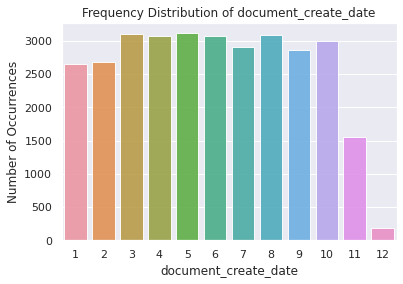

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count =X_train['document_create_date'].dt.month.value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of document_create_date')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('document_create_date', fontsize=12)
plt.show()

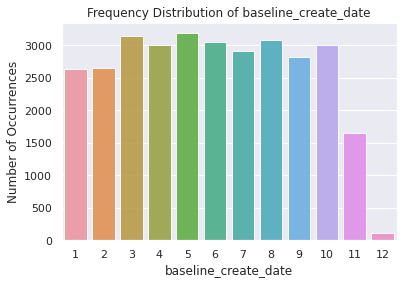

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count =X_train['baseline_create_date'].dt.month.value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of baseline_create_date')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('baseline_create_date', fontsize=12)
plt.show()

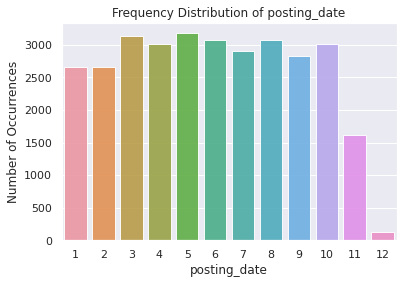

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count =X_train['posting_date'].dt.month.value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of posting_date')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('posting_date', fontsize=12)
plt.show()

We can observe the distribution of the three plots over document_create_date,Posting_date, and baseline_create_date look to be similar as they have a greater decrease during the month of december and increase in the mid-months

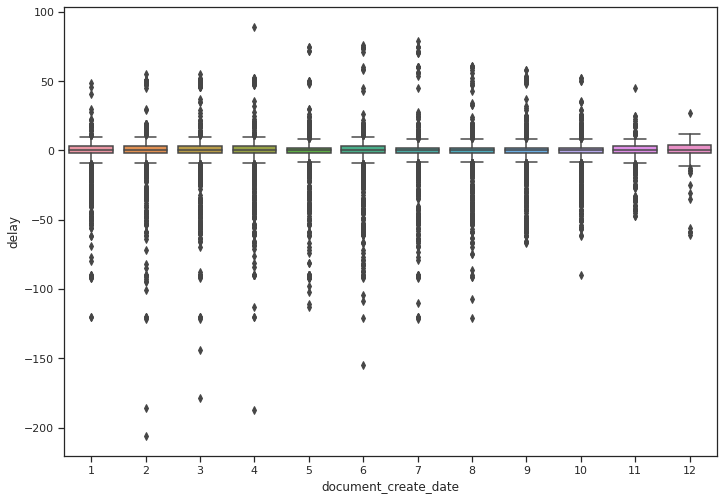

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.set_theme(style="whitegrid")
sns.boxplot(x=X_train['document_create_date'].dt.month,y='delay',data=X_train)

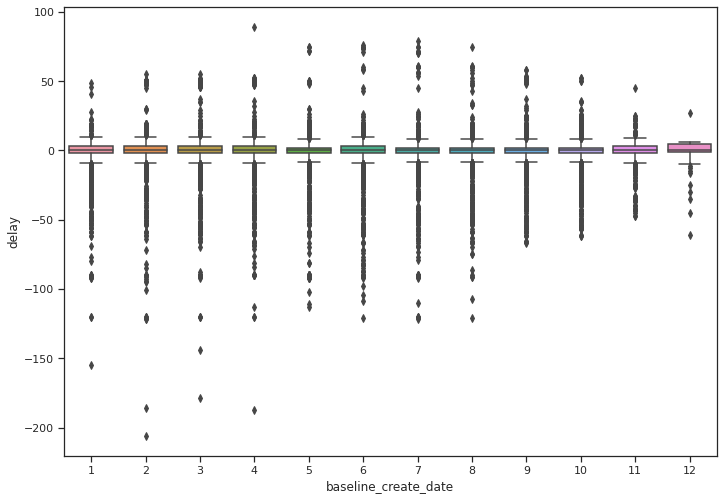

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.set_theme(style="whitegrid")
sns.boxplot(x=X_train['baseline_create_date'].dt.month,y='delay',data=X_train)

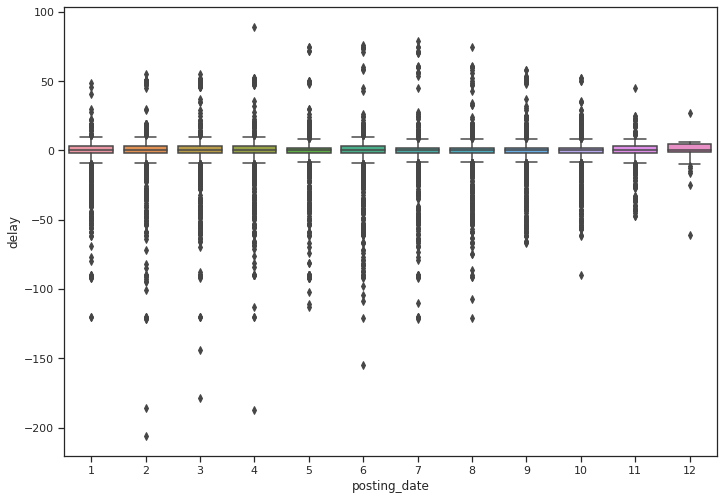

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.set_theme(style="whitegrid")
sns.boxplot(x=X_train['posting_date'].dt.month,y='delay',data=X_train)

We can observe some outliers similarly for the three date columns but also let us examine them using scatter plot even to check which date column would be more useful to us from the three by examing which has the least number of outliers

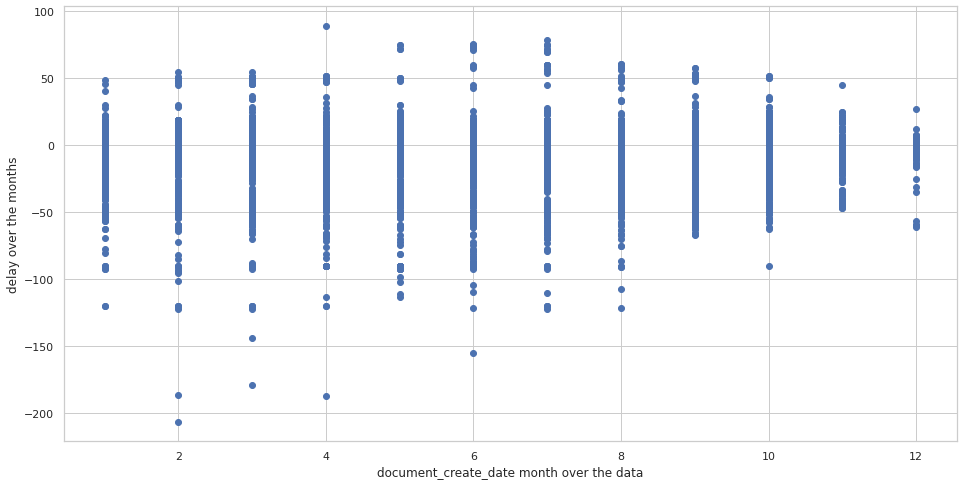

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X_train['document_create_date'].dt.month, X_train['delay'])
ax.set_xlabel('document_create_date month over the data')
ax.set_ylabel('delay over the months')
plt.show()

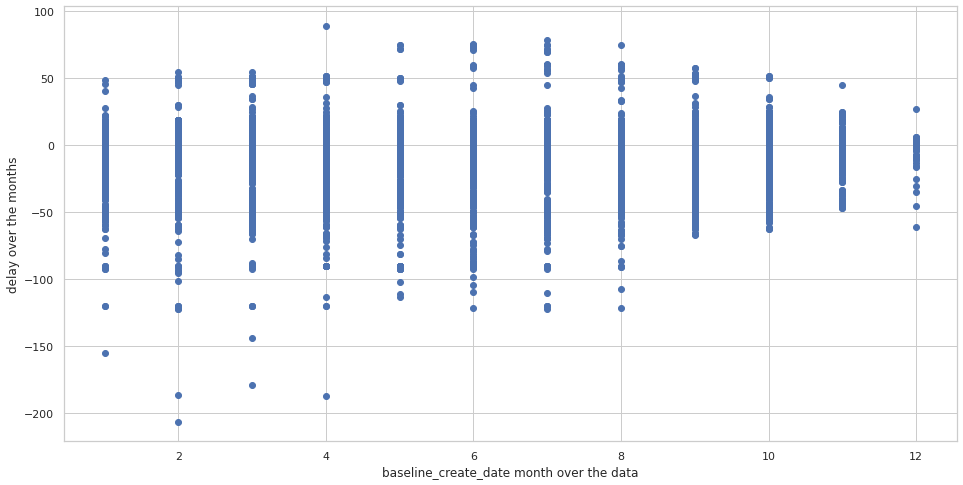

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X_train['baseline_create_date'].dt.month, X_train['delay'])
ax.set_xlabel('baseline_create_date month over the data')
ax.set_ylabel('delay over the months')
plt.show()

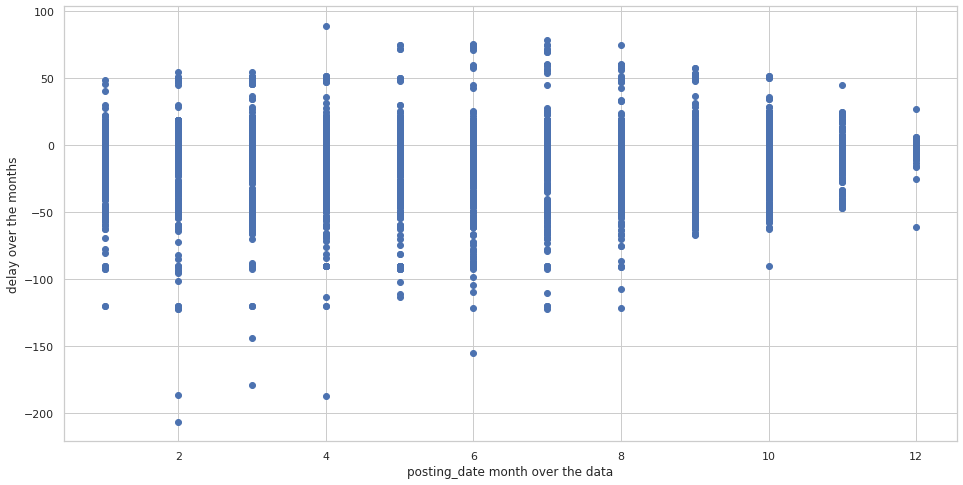

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X_train['posting_date'].dt.month, X_train['delay'])
ax.set_xlabel('posting_date month over the data')
ax.set_ylabel('delay over the months')
plt.show()

From the above three scatterplots we can observe that commonly all of these three date columns behave similarly to outliers 
posting_date has lesser number of outliers than the other two date columns for some months which can also be seen below and even we considered this column for sorting the data so we can keep this column of data and remove the other date columns.

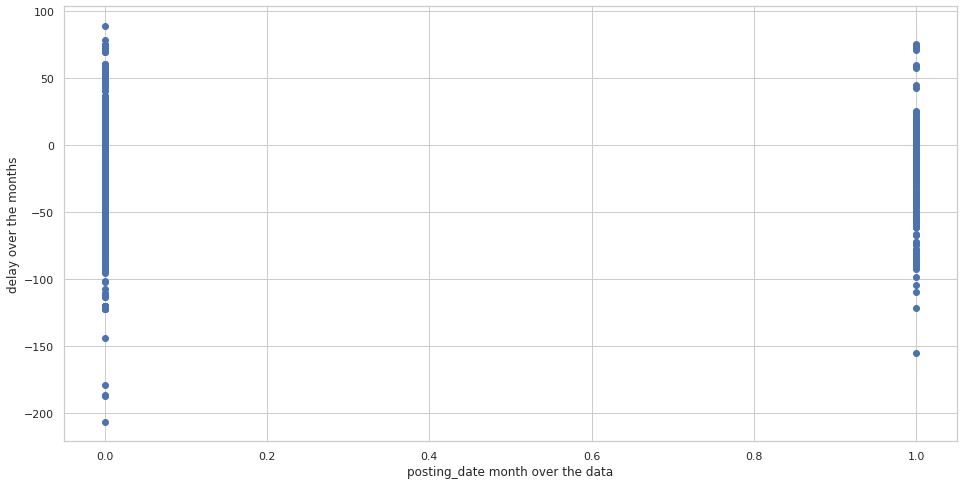

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X_train['posting_date'].dt.month==6, X_train['delay'])
ax.set_xlabel('posting_date month over the data')
ax.set_ylabel('delay over the months')
plt.show()

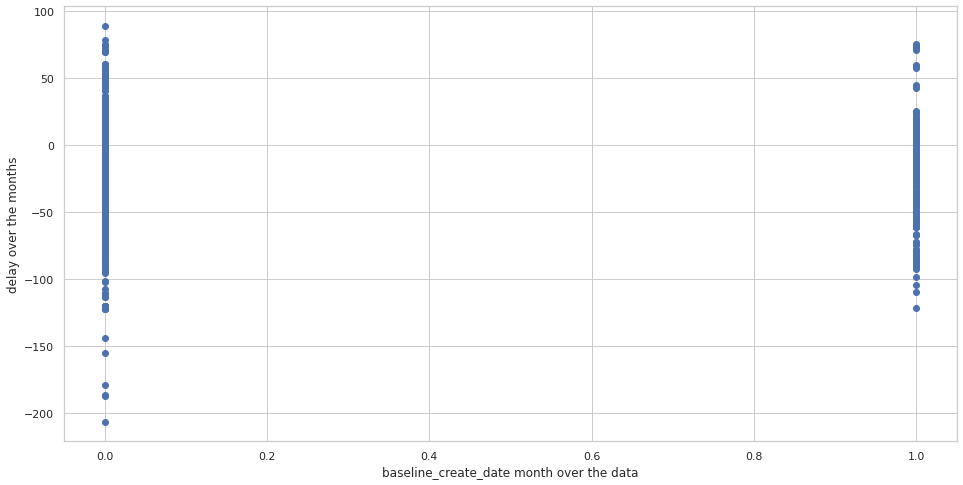

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X_train['baseline_create_date'].dt.month==6, X_train['delay'])
ax.set_xlabel('baseline_create_date month over the data')
ax.set_ylabel('delay over the months')
plt.show()

From these above two plots we can see that posting_date has less outliers than the other two columns.So we will remove the other two date columns as they behave similar to posting_date.

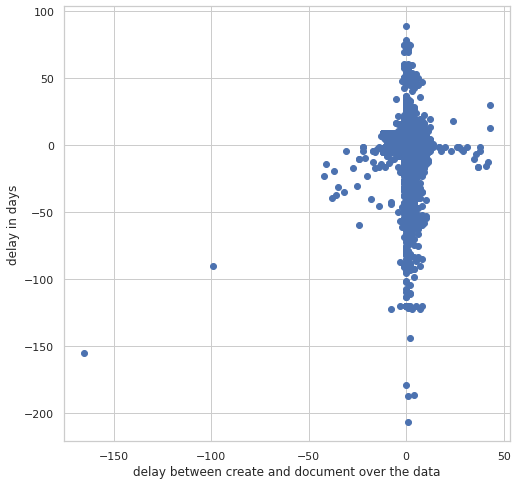

In [ ]:
col=X_train['baseline_create_date']-X_train['document_create_date']
col=pd.to_numeric(col.dt.days, downcast='integer')
# col.value_counts()
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(col, X_train['delay'])
ax.set_xlabel('delay between create and document over the data')
ax.set_ylabel('delay in days')
plt.show()

From this we can also observe that there is not much differnce between the baseline_create_date and document_create_date so it means most of the time the document was updated once the invoice is created.

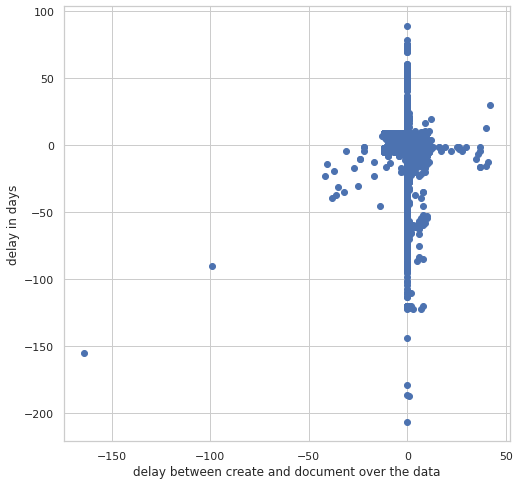

In [ ]:
col=X_train['baseline_create_date']-X_train['posting_date']
col=pd.to_numeric(col.dt.days, downcast='integer')
# col.value_counts()
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(col, X_train['delay'])
ax.set_xlabel('delay between create and document over the data')
ax.set_ylabel('delay in days')
plt.show()

Above plot also gives us the inference that both the shipment of order and the invoice were created on the same days except some where the delay might have occured due to some holidays or some extra work which would have led for the late shipment or creation of invoice.

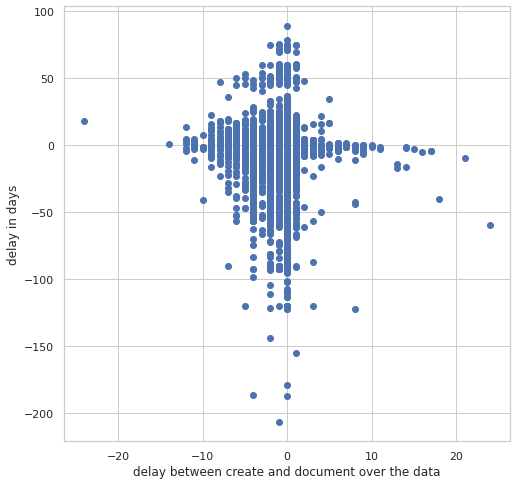

In [ ]:
col=X_train['document_create_date']-X_train['posting_date']
col=pd.to_numeric(col.dt.days, downcast='integer')
# col.value_counts()
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(col, X_train['delay'])
ax.set_xlabel('delay between create and document over the data')
ax.set_ylabel('delay in days')
plt.show()

This plot was expected in the same way as it would happen that the document was created early but the shipment of order might have done late. And we can also observe that if there is a difference in the creation and posting date of the document then there is an increase or decrease in the delay. So we will try to use this differnce by feature engineering.

From all the above inferences for the three date columns we can observe that they behave in similar manner towards delay so we can even delete the document_create_date and base_line_create_date from our train data in the future engineering.<br>
And we can divide our posting date into days, months and year.

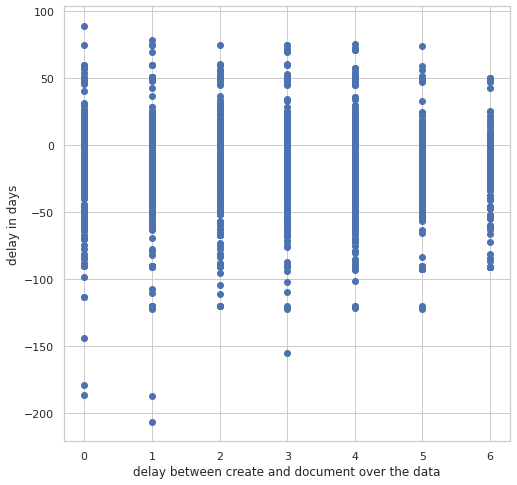

In [ ]:
# relation between the weekday of the postingdate and delay
col=X_train['posting_date'].dt.weekday
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(col, X_train['delay'])
ax.set_xlabel('delay between create and document over the data')
ax.set_ylabel('delay in days')
plt.show()

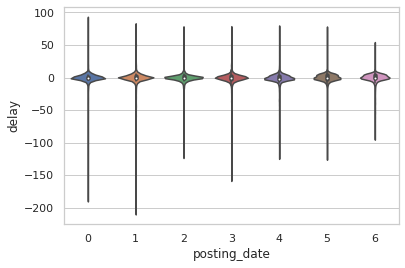

In [ ]:
sns.violinplot(x=X_train['posting_date'].dt.weekday,y='delay',data=X_train,size=15)

From the above two plots we can observe that more delay is occuring on the beginning of the weekdays when the posting occurs

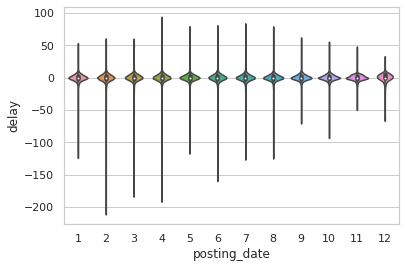

In [ ]:
sns.violinplot(x=X_train['posting_date'].dt.month,y='delay',data=X_train,size=15)

We can also observe that the delay occurs mostly even in the first half of the year than the second half when the orders are shipped.

#### for cust_payment_terms

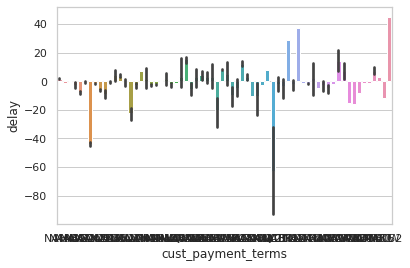

In [ ]:
sns.barplot(x='cust_payment_terms',y='delay',data=X_train)

We cannot infer anything from this so we will further try to reduce this categories and have a look.

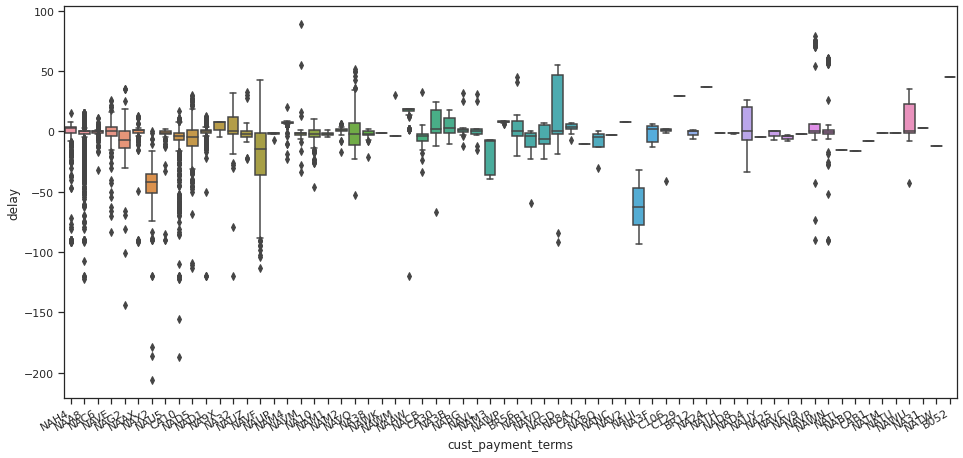

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 8)
fig.autofmt_xdate()
sns.set_theme(style="whitegrid")
sns.boxplot(x=X_train['cust_payment_terms'],y='delay',data=X_train)

We cannot infer anything from this plot so we will try to map the payment terms into three categories as high,mid and low numbered and then try to visualize.

In [ ]:

X_train['cust_payment_terms'].value_counts()


NAA8    12596
NAH4     8107
CA10     2413
NAC6     1023
NAM4      831
NAAX      747
NAG2      659
NAD1      609
NAU5      603
NAGD      489
NAX2      477
NA32      469
NAM2      304
NA10      267
NAD5      220
NAVE      190
NAVF      176
NAM1      160
NAAW      141
NAWU      118
NAWN      104
NAVR       81
NAVQ       73
NAUZ       54
NAWP       42
NAVM       34
NA38       32
CA30       28
NA3B       28
NACB       26
NABG       20
NAB1       17
BR56       16
NAD4       12
NA84       12
NAVL       10
C106       10
NAVD        9
NA3F        7
NAM3        7
NA9X        7
NATH        6
NAUP        5
NAWM        5
NA8Q        4
NAD8        3
NAVC        3
NA25        3
BR12        3
NATU        2
NAUI        2
NAV9        2
NA24        1
NANC        1
NATW        1
CAB1        1
B052        1
NA31        1
NATM        1
NATL        1
NAUY        1
NAWK        1
NAV2        1
CAX2        1
C129        1
NABD        1
Name: cust_payment_terms, dtype: int64

In [ ]:
X_train['cust_payment_terms'].value_counts().index

Index(['NAA8', 'NAH4', 'CA10', 'NAC6', 'NAM4', 'NAAX', 'NAG2', 'NAD1', 'NAU5',
       'NAGD', 'NAX2', 'NA32', 'NAM2', 'NA10', 'NAD5', 'NAVE', 'NAVF', 'NAM1',
       'NAAW', 'NAWU', 'NAWN', 'NAVR', 'NAVQ', 'NAUZ', 'NAWP', 'NAVM', 'NA38',
       'CA30', 'NA3B', 'NACB', 'NABG', 'NAB1', 'BR56', 'NAD4', 'NA84', 'NAVL',
       'C106', 'NAVD', 'NA3F', 'NAM3', 'NA9X', 'NATH', 'NAUP', 'NAWM', 'NA8Q',
       'NAD8', 'NAVC', 'NA25', 'BR12', 'NATU', 'NAUI', 'NAV9', 'NA24', 'NANC',
       'NATW', 'CAB1', 'B052', 'NA31', 'NATM', 'NATL', 'NAUY', 'NAWK', 'NAV2',
       'CAX2', 'C129', 'NABD'],
      dtype='object')

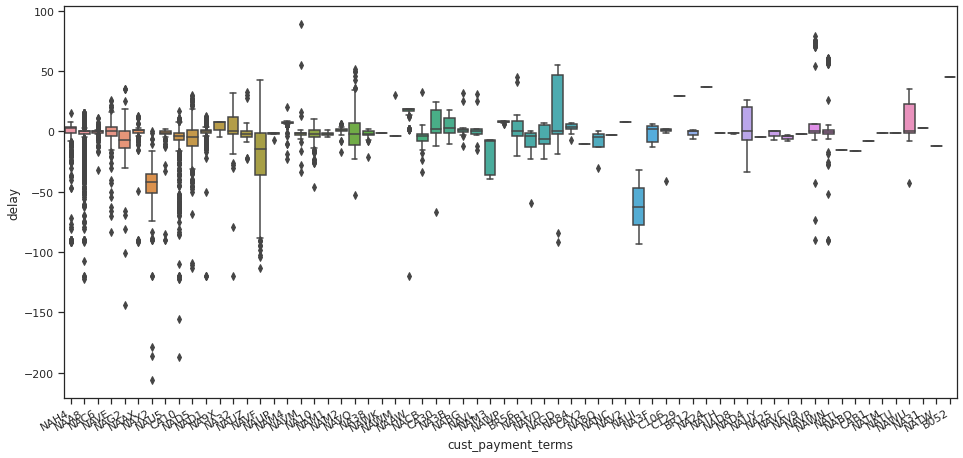

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 8)
fig.autofmt_xdate()
sns.set_theme(style="whitegrid")
sns.boxplot(x=X_train['cust_payment_terms'],y='delay',data=X_train)

Now we can observe better than previously, Yes we may loose some information during prediction but we would not overfit with several number of categories now. We can also observe that there is more delay for cust_payment_terms where it is for mid_cust_payment_terms and CA10.
And we can also observe many outliers in the data, For this we will further try to infer whether to remove these or with a more appropriate way in which it will be handled by our model.

In [ ]:
# This would show us the max delay made by a customer to pay his bill
X_train['delay'].min()

-206

In [ ]:
# This would show the max number of days before the due date when the customer has paid his amount
X_train['delay'].max()

89

In [ ]:
X_train['invoice_currency'].nunique()

2

#### for Cust_number


In [ ]:
X_train['cust_number'].value_counts()

0200769623    6791
0200726979    1182
0200762301     892
0200759878     754
0200794332     669
200769623      605
0200744019     600
0200772670     585
0200705742     487
CCU013         470
0200707822     449
CCCA02         381
0200418007     356
0140106408     325
0200780383     319
0140104409     302
0200803720     266
0100031704     257
0140104429     249
0200799367     242
0200230690     240
0200706844     231
0200761734     225
0200936373     221
0200974851     220
0200353024     219
0200793568     218
0140105686     210
0200148860     202
0140104440     195
0200704858     195
0200416837     192
0200020431     165
0200772595     164
0200729942     162
0200764795     143
0200739534     135
0200782001     133
0200792734     132
0200900909     131
0140105847     131
0200714710     128
0200592182     125
0200752302     123
CCU002         123
0200763814     110
0200331749     109
0200777735     108
0200792293     108
0200704045     106
0200781803     104
200794332      104
0140104423  

We have many cust_numbers for many categories so we can encode them in a typical way like by segregating the two_digit counts and one_digit counts separately.

In [ ]:
# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : x<10].index),"one_digit_cust_number",X_train['cust_number'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=10,x<100))].index),"two_digit_cust_number",X_train['cust_number'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=100,x<200))].index),"from_100_to_200_cust_number",X_train['cust_number'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=200,x<300))].index),"from_200_to_300_cust_number",X_train['cust_number'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=300,x<400))].index),"from_300_to_400_cust_number",X_train['cust_number'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=400,x<600))].index),"from_400_to_600_cust_number",X_train['cust_number'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=600,x<700))].index),"from_600_to_700_cust_number",X_train['cust_number'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=700,x<900))].index),"from_700_to_900_cust_number",X_train['cust_number'])

In [ ]:
X_train['cust_number'].value_counts()


two_digit_cust_number          7422
0200769623                     6791
from_100_to_200_cust_number    3126
from_200_to_300_cust_number    3000
one_digit_cust_number          2565
from_400_to_600_cust_number    1991
from_600_to_700_cust_number    1874
from_300_to_400_cust_number    1683
from_700_to_900_cust_number    1646
0200726979                     1182
Name: cust_number, dtype: int64

Now we have lesser number of categories in the cust_number so now we can try to check the relation with this column

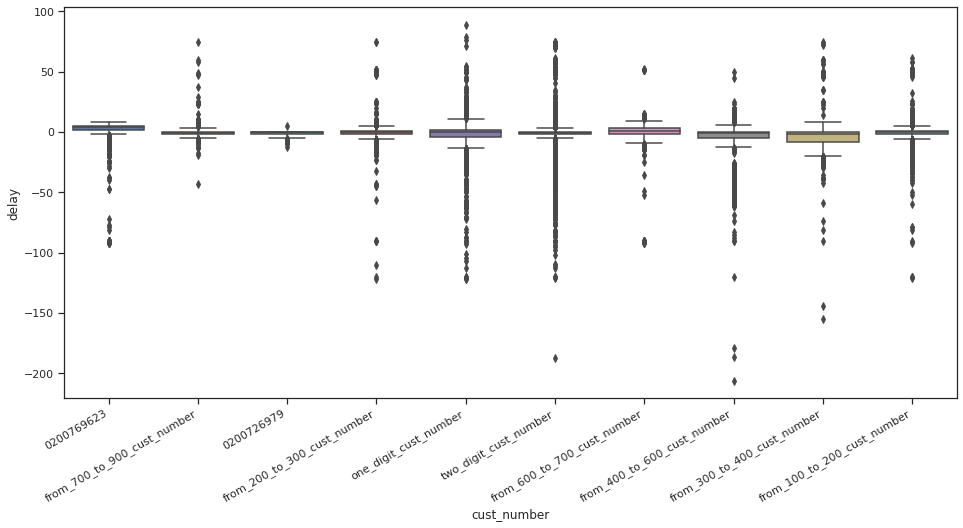

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 8)
fig.autofmt_xdate()
sns.set_theme(style="whitegrid")
sns.boxplot(x=X_train['cust_number'],y='delay',data=X_train)

Now we can observe that we have there are more number of delays for two digit and one digit customer number and there are also some outliers for 400_to_600_cust_number.

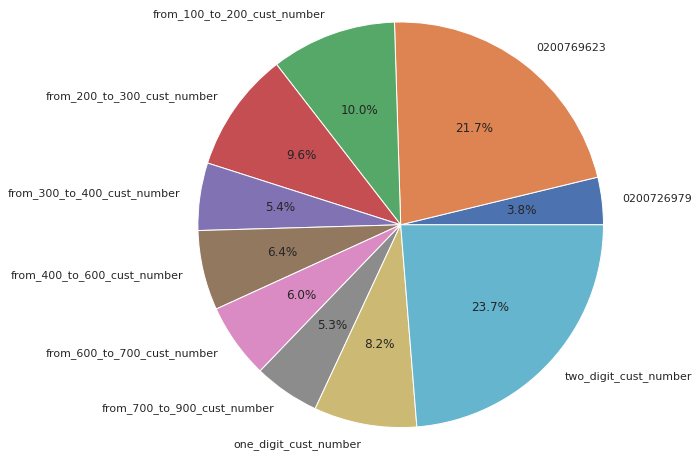

In [ ]:
labels = X_train['cust_number'].astype('category').cat.categories.tolist()
counts = X_train['cust_number'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
fig1.set_size_inches(8, 8)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [ ]:
X_train.head()

business_code                  cust_number name_customer posting_date  \
0          U001                   0200769623   WAL-MAR llc   2018-12-30   
1          U001  from_700_to_900_cust_number           SA    2018-12-30   
2          U001                   0200726979      BJ'S  us   2018-12-30   
3          U001  from_200_to_300_cust_number    DOLLA corp   2018-12-30   
4          U001                   0200769623    WAL-MAR in   2018-12-30   

  document_create_date invoice_currency  total_open_amount  \
0           2018-12-30              USD           11475.96   
1           2018-12-30              USD           36053.19   
2           2018-12-29              USD             152.79   
3           2018-12-29              USD           17507.51   
4           2018-12-30              USD           41309.00   

  baseline_create_date cust_payment_terms    invoice_id  delay  
0           2018-12-30               NAH4  1.928543e+09     -3  
1           2018-12-30               NAH4  1.928544e+09     -8  
2           2018-12-30               NAA8  1.928542e+09     -1  
3           2018-12-30               NAA8  1.928540e+09      0  
4           2018-12-30               NAH4  1.928544e+09      4

#### <b> for name_customer

In [ ]:
# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=1,x<5))].index),"from_1_to_5_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=5,x<10))].index),"from_5_to_10_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=10,x<15))].index),"from_10_to_15_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=15,x<20))].index),"from_15_to_20_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=20,x<25))].index),"from_20_to_25_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=25,x<30))].index),"from_25_to_30_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=30,x<40))].index),"from_30_to_40_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=40,x<50))].index),"from_40_to_50_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=50,x<60))].index),"from_50_to_60_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=60,x<70))].index),"from_60_to_70_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=70,x<80))].index),"from_70_to_80_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=80,x<90))].index),"from_80_to_90_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=90,x<100))].index),"from_90_to_100_cust_name",X_train['name_customer'])

# clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=100,x<150))].index),"from_100_to_150_cust_name",X_train['name_customer'])


In [ ]:
X_train['name_customer'].value_counts()

from_1_to_5_cust_name        4221
from_5_to_10_cust_name       2599
from_30_to_40_cust_name      2220
from_40_to_50_cust_name      2115
from_50_to_60_cust_name      1892
from_10_to_15_cust_name      1798
from_100_to_150_cust_name    1573
from_60_to_70_cust_name      1482
from_25_to_30_cust_name      1258
from_20_to_25_cust_name      1185
from_15_to_20_cust_name      1151
from_80_to_90_cust_name      1029
from_70_to_80_cust_name       807
WAL-MAR trust                 710
WAL-MAR co                    694
WAL-MAR corporation           692
WAL-MAR llc                   677
WAL-MAR us                    672
WAL-MAR foundation            668
WAL-MAR systems               667
WAL-MAR                       665
WAL-MAR corp                  662
WAL-MAR in                    652
WAL-MAR associates            637
from_90_to_100_cust_name      554
Name: name_customer, dtype: int64

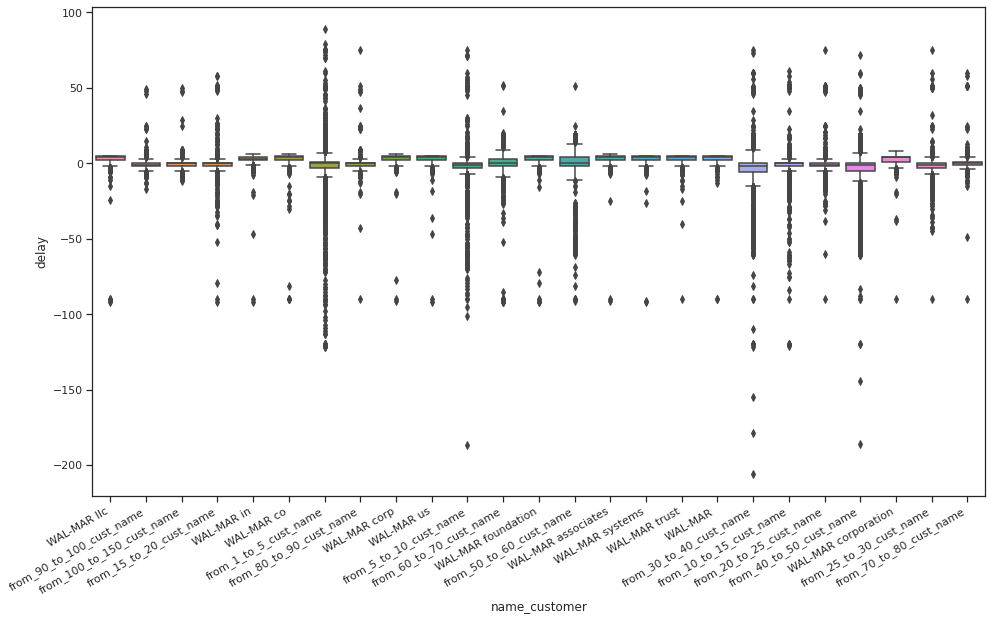

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 10)
fig.autofmt_xdate()
sns.set_theme(style="whitegrid")
sns.boxplot(x=X_train['name_customer'],y='delay',data=X_train)

We can observe that from_1_to_5_cust_name has more number of delays, this may also happen as we have more amount of data in this category and also we can observe more number of outliers in the 30_40_cust_name column.

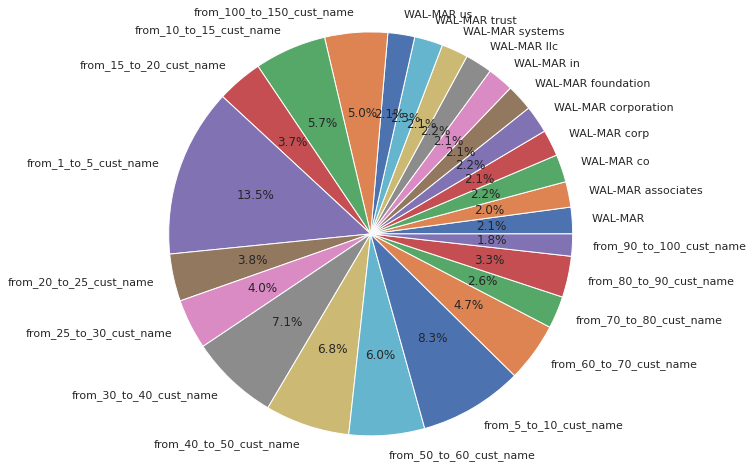

In [ ]:
labels = X_train['name_customer'].astype('category').cat.categories.tolist()
counts = X_train['name_customer'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
fig1.set_size_inches(8, 8)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [ ]:
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date document_create_date invoice_currency  total_open_amount  \
0   2018-12-30           2018-12-30              USD           11475.96   
1   2018-12-30           2018-12-30              USD           36053.19   
2   2018-12-30           2018-12-29              USD             152.79   
3   2018-12-30           2018-12-29              USD           17507.51   
4   2018-12-30           2018-12-30              USD           41309.00   

  baseline_create_date cust_payment_terms    invoice_id  delay  
0           2018-12-30               NAH4  1.928543e+09     -3  
1           2018-12-30               NAH4  1.928544e+09     -8  
2           2018-12-30               NAA8  1.928542e+09     -1  
3           2018-12-30               NAA8  1.928540e+09      0  
4           2018-12-30               NAH4  1.928544e+09      4

#### <b>For Business code

In [ ]:
X_train['business_code'].value_counts()

U001    28197
CA02     2493
U013      445
U002      125
U005       18
U007        2
Name: business_code, dtype: int64

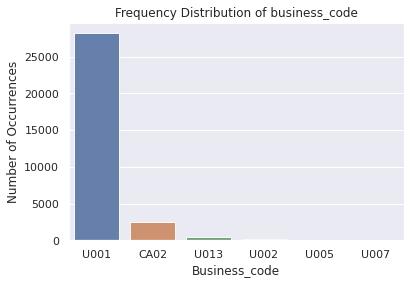

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = X_train['business_code'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of business_code')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Business_code', fontsize=12)
plt.show()

In [ ]:
X_train['business_code'].value_counts().index

Index(['U001', 'CA02', 'U013', 'U002', 'U005', 'U007'], dtype='object')

As we can observe that we have very less values for U002,U005,U007 categories so we can try to combine them and make a other category as other business_code as these values may get overwhelmed by the other categories. 

In [ ]:
# clubbing business_code with mid occurance in dataset - to ensure model gets max information
X_train['business_code'] = np.where(X_train['business_code'].isin(['U002','U005','U007']),"other_business_code",X_train['business_code'])


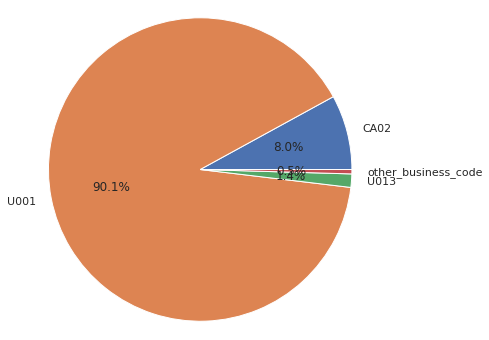

In [ ]:
labels = X_train['business_code'].astype('category').cat.categories.tolist()
counts = X_train['business_code'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
fig1.set_size_inches(6, 6)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

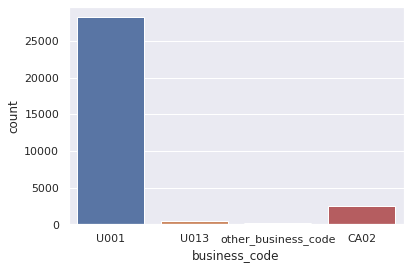

In [ ]:
sns.countplot(x ='business_code',data=X_train)

We can observe very high number of categories for U001 rather than others.So It may even overwhelm the other categories

In [ ]:
print(X_train['business_code'].value_counts())
print("*"*30)
print(X_train['business_code'].value_counts().count())

U001                   28197
CA02                    2493
U013                     445
other_business_code      145
Name: business_code, dtype: int64
******************************
4



As we can observe there are 4  different categories in business code, we can encode them.

In [ ]:
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date document_create_date invoice_currency  total_open_amount  \
0   2018-12-30           2018-12-30              USD           11475.96   
1   2018-12-30           2018-12-30              USD           36053.19   
2   2018-12-30           2018-12-29              USD             152.79   
3   2018-12-30           2018-12-29              USD           17507.51   
4   2018-12-30           2018-12-30              USD           41309.00   

  baseline_create_date cust_payment_terms    invoice_id  delay  
0           2018-12-30               NAH4  1.928543e+09     -3  
1           2018-12-30               NAH4  1.928544e+09     -8  
2           2018-12-30               NAA8  1.928542e+09     -1  
3           2018-12-30               NAA8  1.928540e+09      0  
4           2018-12-30               NAH4  1.928544e+09      4

#### <b> For target delay column

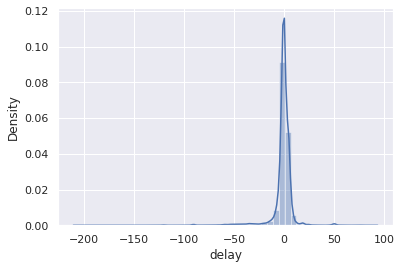

In [ ]:
import seaborn as sns
sns.distplot(X_train['delay'])

Now we can observe that the mean is around 0

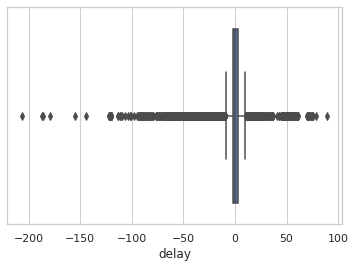

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=X_train['delay'])

We can clearly observe some outliers for the people who have delayed their payments.

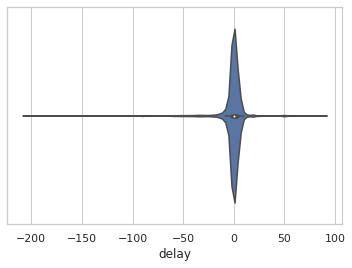

In [ ]:
sns.set_theme(style="whitegrid")
sns.violinplot(x=X_train['delay'])

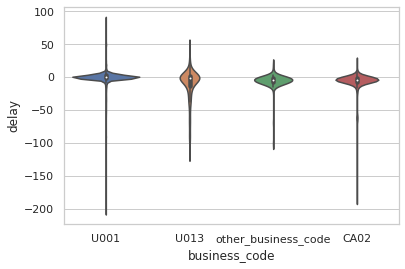

In [ ]:
sns.violinplot(x='business_code',y='delay',data=X_train,size=15)

We can even observe here that customers are more with delays than the customers who paid before the due date.
as we can see that there is much whisker along the negative values,this shows us the delay of customers for payment and we can even observe less whiskers over the positive side,which shows that there are only few customers who pay before the due date.

bin_edges= [-206.   -191.25 -176.5  -161.75 -147.   -132.25 -117.5  -102.75  -88.
  -73.25  -58.5   -43.75  -29.    -14.25    0.5    15.25   30.     44.75
   59.5    74.25   89.  ]


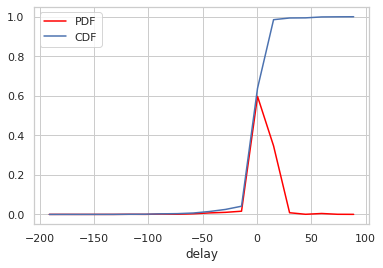

In [ ]:
count, bins_count = np.histogram(X_train['delay'], bins=20,density=True)
plt.xlabel("delay")
# finding the PDF of the histogram using count values
pdf = count / sum(count)
print("bin_edges=",bins_count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

We can observe that when our redline is between 0 to 50, let us take the middle point around 25-30 and we draw a straight line from that point onto the blue curve, it intersects the blue line at a value approximately equal to 0.8 so we can say that about 80% of customers pay their amount either with a delay or about 25-30 days before the due_date as the range lies between -206 to 30. 

#### <b>For Invoice Currency

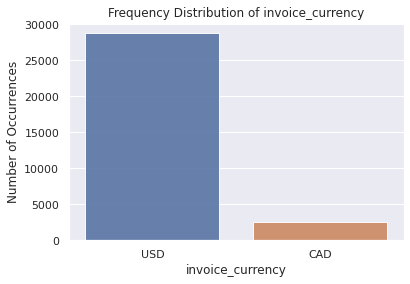

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = X_train['invoice_currency'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of invoice_currency')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('invoice_currency', fontsize=12)
plt.show()

We can observe majority of the currency is in USD and a minor part is in CAD so we can also convert the CAD to USD during the feature engineering.

In [ ]:
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date document_create_date invoice_currency  total_open_amount  \
0   2018-12-30           2018-12-30              USD           11475.96   
1   2018-12-30           2018-12-30              USD           36053.19   
2   2018-12-30           2018-12-29              USD             152.79   
3   2018-12-30           2018-12-29              USD           17507.51   
4   2018-12-30           2018-12-30              USD           41309.00   

  baseline_create_date cust_payment_terms    invoice_id  delay  
0           2018-12-30               NAH4  1.928543e+09     -3  
1           2018-12-30               NAH4  1.928544e+09     -8  
2           2018-12-30               NAA8  1.928542e+09     -1  
3           2018-12-30               NAA8  1.928540e+09      0  
4           2018-12-30               NAH4  1.928544e+09      4

####<b>For Invoice_id

In [ ]:
X_train['invoice_id'].value_counts().count()

31280

We can observe that invoice_id is totally unique in the dataset so we can remove this column from the dataset during feature engineering.

In [ ]:
# categorical and numerical data
cat_train = X_train.select_dtypes(include=['object']).copy()
num_train=X_train.select_dtypes(include=['int','float']).copy()

#### <b>For total_open_amount

Skewness: 3.180961
Kurtosis: 30.067138


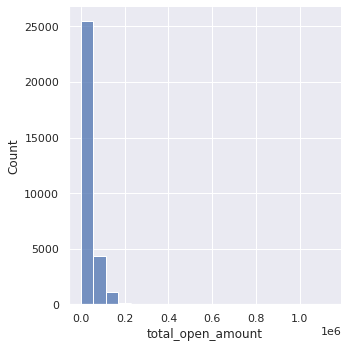

In [ ]:
sns.displot(X_train['total_open_amount'], bins=20)

print("Skewness: %f" % X_train['total_open_amount'].skew())
print("Kurtosis: %f" % X_train['total_open_amount'].kurt())

Yes we can observe some skewness and kurtosis in the total_open_amount column but it may raise a problem if we do log imputations because log imputations may change the amount values and round off the values which might be a problem so we will try to keep this column same.

In [ ]:
for col in num_train.columns:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(num_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(num_train[col].kurt())  )

total_open_amount Skewness: 03.18     Kurtosis: 030.07
invoice_id      Skewness: 03.10     Kurtosis: 007.62


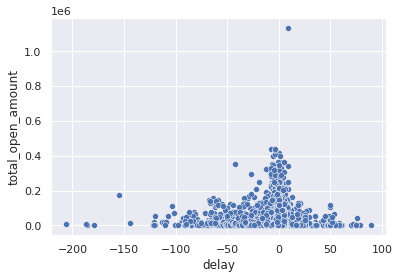

In [ ]:
sns.scatterplot(x = 'delay', y='total_open_amount', data= X_train)

In [ ]:
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date document_create_date invoice_currency  total_open_amount  \
0   2018-12-30           2018-12-30              USD           11475.96   
1   2018-12-30           2018-12-30              USD           36053.19   
2   2018-12-30           2018-12-29              USD             152.79   
3   2018-12-30           2018-12-29              USD           17507.51   
4   2018-12-30           2018-12-30              USD           41309.00   

  baseline_create_date cust_payment_terms    invoice_id  delay  
0           2018-12-30               NAH4  1.928543e+09     -3  
1           2018-12-30               NAH4  1.928544e+09     -8  
2           2018-12-30               NAA8  1.928542e+09     -1  
3           2018-12-30               NAA8  1.928540e+09      0  
4           2018-12-30               NAH4  1.928544e+09      4

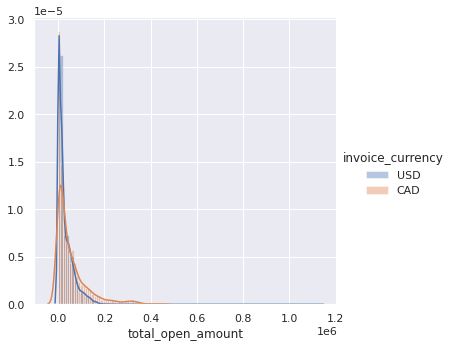

In [ ]:
sns.FacetGrid(X_train,hue='invoice_currency',size=5).map(sns.distplot,'total_open_amount').add_legend()

We can observe that our distribution is right skewed but this is over the total_open_amount column so we will try to handle this with the help of our model rather than normalizing the data

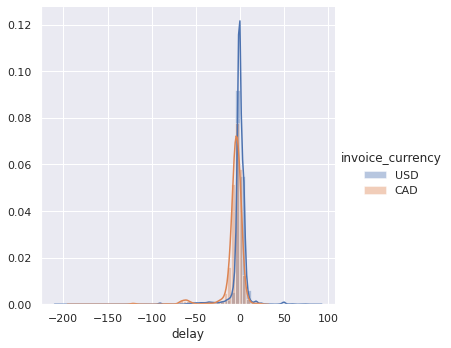

In [ ]:
sns.FacetGrid(X_train,hue='invoice_currency',size=5).map(sns.distplot,'delay').add_legend()

Here even we can observe that delay is present for both USD and CAD invoice_currency and the distribution is even centered over the mean

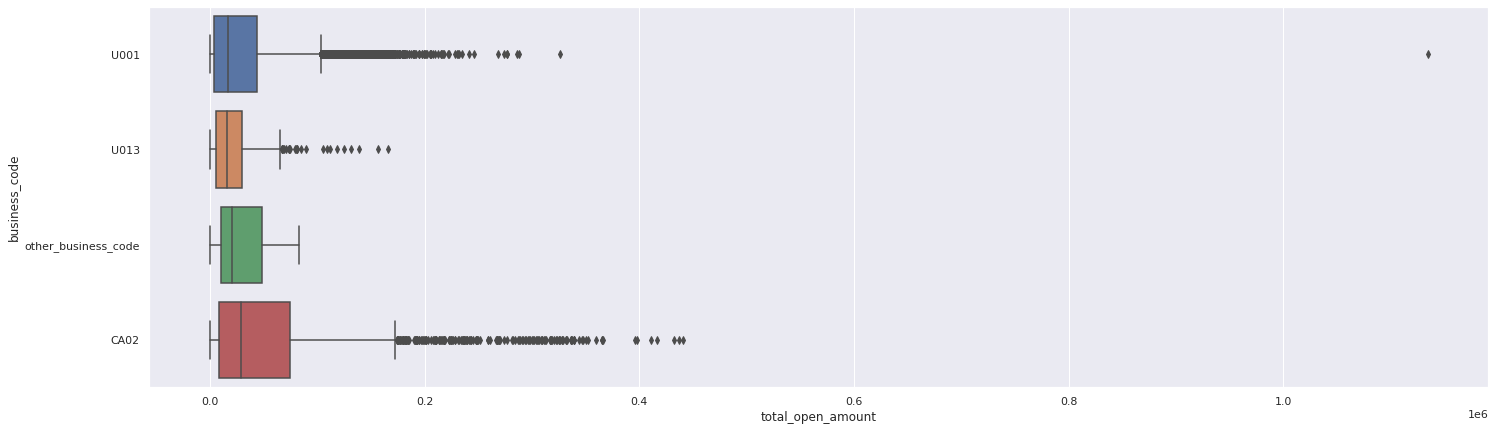

In [ ]:
plt.figure(figsize=(24,7))
sns.boxplot(y="business_code", x="total_open_amount", data=X_train)

We can observe that there are some outliers for three business_codes over the total_open_amount but we should be careful to handle the outliers becuase these are in the amount column and this may determine the financial value like in the past data we may have lesser amounts as compared to the amounts in the future where they may increase due to several reasons.<br>
So one of the best option for us would also be to use any tree based regressor like the Xgboost or Random forest that could handle outliers as remove outliers may be risky due to the financial total_open_amount column.

### Feature Engineering


In [ ]:
X_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
delay                            int16
dtype: object

In [ ]:
# X_train['business_code'] = X_train['business_code'].astype('category')
X_train['cust_number'] = X_train['cust_number'].astype('category')
X_train['name_customer'] = X_train['name_customer'].astype('category')
# X_train['cust_payment_terms'] = X_train['cust_payment_terms'].astype('category')

In [ ]:
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date document_create_date invoice_currency  total_open_amount  \
0   2018-12-30           2018-12-30              USD           11475.96   
1   2018-12-30           2018-12-30              USD           36053.19   
2   2018-12-30           2018-12-29              USD             152.79   
3   2018-12-30           2018-12-29              USD           17507.51   
4   2018-12-30           2018-12-30              USD           41309.00   

  baseline_create_date cust_payment_terms    invoice_id  delay  
0           2018-12-30               NAH4  1.928543e+09     -3  
1           2018-12-30               NAH4  1.928544e+09     -8  
2           2018-12-30               NAA8  1.928542e+09     -1  
3           2018-12-30               NAA8  1.928540e+09      0  
4           2018-12-30               NAH4  1.928544e+09      4

####<b>For Invoice_currency and Total_open_amount</b><br>
Here I am trying to change the currency into the same currency value that is USD as It is present in the majority case. For this we can adopt two methods: The first one is simpler, Here we only take the currency rate from the online currency converter table and map the currency in the column. <br>
The Second way is more better as we can also use it during the production, Here I used the forex_python converter to convert the currencies directly and then mapped it on the total_open_amount column.

In [ ]:
# Method-1
# exchange_rate = {'CAD': 0.8133,'USD':1.0}
# X_train['total_open_amount'] = pd.to_numeric(X_train['total_open_amount']) * (X_train['invoice_currency'].map(exchange_rate))

In [ ]:
# Method-2
# use forex_python converter to convert currencies
from forex_python.converter import CurrencyRates
c = CurrencyRates()
rate_val=c.get_rate('CAD', 'USD')

exchange_rate = {'CAD': rate_val,'USD':1.0}
X_train['total_open_amount'] = pd.to_numeric(X_train['total_open_amount']) * (X_train['invoice_currency'].map(exchange_rate))                                                     

In [ ]:
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date document_create_date invoice_currency  total_open_amount  \
0   2018-12-30           2018-12-30              USD           11475.96   
1   2018-12-30           2018-12-30              USD           36053.19   
2   2018-12-30           2018-12-29              USD             152.79   
3   2018-12-30           2018-12-29              USD           17507.51   
4   2018-12-30           2018-12-30              USD           41309.00   

  baseline_create_date cust_payment_terms    invoice_id  delay  
0           2018-12-30               NAH4  1.928543e+09     -3  
1           2018-12-30               NAH4  1.928544e+09     -8  
2           2018-12-30               NAA8  1.928542e+09     -1  
3           2018-12-30               NAA8  1.928540e+09      0  
4           2018-12-30               NAH4  1.928544e+09      4

In [ ]:
X_train[X_train['invoice_currency']== 'CAD'].head()

business_code                  cust_number            name_customer  \
33          CA02  from_300_to_400_cust_number  from_30_to_40_cust_name   
54          CA02        two_digit_cust_number   from_5_to_10_cust_name   
60          CA02  from_300_to_400_cust_number  from_20_to_25_cust_name   
63          CA02  from_300_to_400_cust_number  from_40_to_50_cust_name   
64          CA02  from_200_to_300_cust_number  from_30_to_40_cust_name   

   posting_date document_create_date invoice_currency  total_open_amount  \
33   2018-12-30           2018-12-30              CAD      106043.320106   
54   2018-12-30           2018-12-30              CAD       17569.701380   
60   2018-12-31           2018-12-31              CAD       53305.756021   
63   2018-12-31           2018-12-31              CAD        2620.852267   
64   2018-12-31           2018-12-31              CAD       10294.677676   

   baseline_create_date cust_payment_terms    invoice_id  delay  
33           2018-12-30               CA10  2.960520e+09    -16  
54           2019-01-03               CA10  2.960520e+09     -4  
60           2019-01-02               CA10  2.960519e+09      1  
63           2018-12-31               CA10  2.960521e+09    -15  
64           2019-01-04               CA10  2.960520e+09     -7

In [ ]:
conv = {'CAD': 'USD','USD':'USD'}
X_train['invoice_currency'] = (X_train['invoice_currency'].map(conv))

In [ ]:
X_train['invoice_currency'].value_counts()

USD    31280
Name: invoice_currency, dtype: int64

Now we have our Invoice currency column values changed into the USD as whole and also the total_open_amount is also changed into the USD.So Now we can remove the invoice currency as it is wholely mapped into USD and has become a constant column.

In [ ]:
X_train=X_train.drop('invoice_currency',axis=1)
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date document_create_date  total_open_amount baseline_create_date  \
0   2018-12-30           2018-12-30           11475.96           2018-12-30   
1   2018-12-30           2018-12-30           36053.19           2018-12-30   
2   2018-12-30           2018-12-29             152.79           2018-12-30   
3   2018-12-30           2018-12-29           17507.51           2018-12-30   
4   2018-12-30           2018-12-30           41309.00           2018-12-30   

  cust_payment_terms    invoice_id  delay  
0               NAH4  1.928543e+09     -3  
1               NAH4  1.928544e+09     -8  
2               NAA8  1.928542e+09     -1  
3               NAA8  1.928540e+09      0  
4               NAH4  1.928544e+09      4

#### <b>For Invoice_id

In [ ]:
X_train['invoice_id'].value_counts().count()

31280

we have already inspected and seen that the invoice id is a unique_id column and we can remove it as it would try to overfit the model by training on these unique values

In [ ]:
X_train=X_train.drop('invoice_id',axis=1)
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date document_create_date  total_open_amount baseline_create_date  \
0   2018-12-30           2018-12-30           11475.96           2018-12-30   
1   2018-12-30           2018-12-30           36053.19           2018-12-30   
2   2018-12-30           2018-12-29             152.79           2018-12-30   
3   2018-12-30           2018-12-29           17507.51           2018-12-30   
4   2018-12-30           2018-12-30           41309.00           2018-12-30   

  cust_payment_terms  delay  
0               NAH4     -3  
1               NAH4     -8  
2               NAA8     -1  
3               NAA8      0  
4               NAH4      4

#### <b>For Document_create_date and base_line_create_date

In [ ]:
X_train['diff_in_base_create_and_doc_create']=X_train['baseline_create_date']-X_train['document_create_date']
X_train['diff_in_base_create_and_doc_create'] = pd.to_numeric(X_train['diff_in_base_create_and_doc_create'].dt.days, downcast='integer')
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date document_create_date  total_open_amount baseline_create_date  \
0   2018-12-30           2018-12-30           11475.96           2018-12-30   
1   2018-12-30           2018-12-30           36053.19           2018-12-30   
2   2018-12-30           2018-12-29             152.79           2018-12-30   
3   2018-12-30           2018-12-29           17507.51           2018-12-30   
4   2018-12-30           2018-12-30           41309.00           2018-12-30   

  cust_payment_terms  delay  diff_in_base_create_and_doc_create  
0               NAH4     -3                                   0  
1               NAH4     -8                                   0  
2               NAA8     -1                                   1  
3               NAA8      0                                   1  
4               NAH4      4                                   0

####<b>For Document_create_date and posting_date

In [ ]:
X_train['diff_in_doc_create_and_posting']=X_train['document_create_date']-X_train['posting_date']
X_train['diff_in_doc_create_and_posting'] = pd.to_numeric(X_train['diff_in_doc_create_and_posting'].dt.days, downcast='integer')
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date document_create_date  total_open_amount baseline_create_date  \
0   2018-12-30           2018-12-30           11475.96           2018-12-30   
1   2018-12-30           2018-12-30           36053.19           2018-12-30   
2   2018-12-30           2018-12-29             152.79           2018-12-30   
3   2018-12-30           2018-12-29           17507.51           2018-12-30   
4   2018-12-30           2018-12-30           41309.00           2018-12-30   

  cust_payment_terms  delay  diff_in_base_create_and_doc_create  \
0               NAH4     -3                                   0   
1               NAH4     -8                                   0   
2               NAA8     -1                                   1   
3               NAA8      0                                   1   
4               NAH4      4                                   0   

   diff_in_doc_create_and_posting  
0                               0  
1                               0  
2                              -1  
3                              -1  
4                               0

Now we can drop our document_create_date and baseline_create_date.

In [ ]:
X_train=X_train.drop('document_create_date',axis=1)
X_train=X_train.drop('baseline_create_date',axis=1)
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date  total_open_amount cust_payment_terms  delay  \
0   2018-12-30           11475.96               NAH4     -3   
1   2018-12-30           36053.19               NAH4     -8   
2   2018-12-30             152.79               NAA8     -1   
3   2018-12-30           17507.51               NAA8      0   
4   2018-12-30           41309.00               NAH4      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  
0                                   0                               0  
1                                   0                               0  
2                                   1                              -1  
3                                   1                              -1  
4                                   0                               0

####<b>Posting_date</b>
We will divide the posting_date into years,months and days separately

In [ ]:
X_train['posting_date_year']=X_train['posting_date'].dt.year
X_train['posting_date_year'] = pd.to_numeric(X_train['posting_date_year'], downcast='integer')
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date  total_open_amount cust_payment_terms  delay  \
0   2018-12-30           11475.96               NAH4     -3   
1   2018-12-30           36053.19               NAH4     -8   
2   2018-12-30             152.79               NAA8     -1   
3   2018-12-30           17507.51               NAA8      0   
4   2018-12-30           41309.00               NAH4      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  \
0                                   0                               0   
1                                   0                               0   
2                                   1                              -1   
3                                   1                              -1   
4                                   0                               0   

   posting_date_year  
0               2018  
1               2018  
2               2018  
3               2018  
4               2018

In [ ]:
X_train['posting_date_month']=X_train['posting_date'].dt.month
X_train['posting_date_month'] = pd.to_numeric(X_train['posting_date_month'], downcast='integer')
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date  total_open_amount cust_payment_terms  delay  \
0   2018-12-30           11475.96               NAH4     -3   
1   2018-12-30           36053.19               NAH4     -8   
2   2018-12-30             152.79               NAA8     -1   
3   2018-12-30           17507.51               NAA8      0   
4   2018-12-30           41309.00               NAH4      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  \
0                                   0                               0   
1                                   0                               0   
2                                   1                              -1   
3                                   1                              -1   
4                                   0                               0   

   posting_date_year  posting_date_month  
0               2018                  12  
1               2018                  12  
2               2018                  12  
3               2018                  12  
4               2018                  12

In [ ]:
X_train['posting_date_day']=X_train['posting_date'].dt.day
X_train['posting_date_day'] = pd.to_numeric(X_train['posting_date_day'], downcast='integer')
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date  total_open_amount cust_payment_terms  delay  \
0   2018-12-30           11475.96               NAH4     -3   
1   2018-12-30           36053.19               NAH4     -8   
2   2018-12-30             152.79               NAA8     -1   
3   2018-12-30           17507.51               NAA8      0   
4   2018-12-30           41309.00               NAH4      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  \
0                                   0                               0   
1                                   0                               0   
2                                   1                              -1   
3                                   1                              -1   
4                                   0                               0   

   posting_date_year  posting_date_month  posting_date_day  
0               2018                  12                30  
1               2018                  12                30  
2               2018                  12                30  
3               2018                  12                30  
4               2018                  12                30

In [ ]:
X_train['posting_date'].dt.weekday.value_counts()

2    5649
1    5290
3    5278
4    5135
0    4268
5    3073
6    2587
Name: posting_date, dtype: int64

As we have even observed in our EDA that the delay is mostly occuring during the first half of the week so we will try to preserve this data even

In [ ]:
X_train['day_of_week'] = X_train['posting_date'].dt.weekday 
X_train['day_of_week'] = pd.to_numeric(X_train['day_of_week'], downcast='integer')
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

  posting_date  total_open_amount cust_payment_terms  delay  \
0   2018-12-30           11475.96               NAH4     -3   
1   2018-12-30           36053.19               NAH4     -8   
2   2018-12-30             152.79               NAA8     -1   
3   2018-12-30           17507.51               NAA8      0   
4   2018-12-30           41309.00               NAH4      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  \
0                                   0                               0   
1                                   0                               0   
2                                   1                              -1   
3                                   1                              -1   
4                                   0                               0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  
0               2018                  12                30            6  
1               2018                  12                30            6  
2               2018                  12                30            6  
3               2018                  12                30            6  
4               2018                  12                30            6

Now we can remove our posting_date column from the data

In [ ]:
X_train=X_train.drop('posting_date',axis=1)
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

   total_open_amount cust_payment_terms  delay  \
0           11475.96               NAH4     -3   
1           36053.19               NAH4     -8   
2             152.79               NAA8     -1   
3           17507.51               NAA8      0   
4           41309.00               NAH4      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  \
0                                   0                               0   
1                                   0                               0   
2                                   1                              -1   
3                                   1                              -1   
4                                   0                               0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  
0               2018                  12                30            6  
1               2018                  12                30            6  
2               2018                  12                30            6  
3               2018                  12                30            6  
4               2018                  12                30            6

#### <b>Encoding Categorical values.</b><br>
-> We will try to use OneHotEncoding if the number of categories in the column are less<br>
->  We will try to use LabelEncoding if the number of categories in the column are more<br>
Also there are many other encoding techques which can also be used.

In [ ]:
X_train.dtypes

business_code                           object
cust_number                           category
name_customer                         category
total_open_amount                      float64
cust_payment_terms                      object
delay                                    int16
diff_in_base_create_and_doc_create       int16
diff_in_doc_create_and_posting            int8
posting_date_year                        int16
posting_date_month                        int8
posting_date_day                          int8
day_of_week                               int8
dtype: object

#####<b> custom_encoder for customer_payment_terms used in orange cup KDD Hackathon on payment_terms

In [ ]:
# list with most 20 frequent categories
top_10_payment_terms=[x for x in X_train['cust_payment_terms'].value_counts().sort_values(ascending=False).head(20).index]
variable='cust_payment_terms'
# Now we will make the 10 binary labels 
for label in top_10_payment_terms:
  X_train[variable+'_'+label] = np.where(X_train['cust_payment_terms'] == label, 1,0) 

In [ ]:
X_train.head()

business_code                  cust_number              name_customer  \
0          U001                   0200769623                WAL-MAR llc   
1          U001  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          U001                   0200726979  from_100_to_150_cust_name   
3          U001  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          U001                   0200769623                 WAL-MAR in   

   total_open_amount cust_payment_terms  delay  \
0           11475.96               NAH4     -3   
1           36053.19               NAH4     -8   
2             152.79               NAA8     -1   
3           17507.51               NAA8      0   
4           41309.00               NAH4      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  \
0                                   0                               0   
1                                   0                               0   
2                                   1                              -1   
3                                   1                              -1   
4                                   0                               0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  \
0               2018                  12                30            6   
1               2018                  12                30            6   
2               2018                  12                30            6   
3               2018                  12                30            6   
4               2018                  12                30            6   

   cust_payment_terms_NAA8  cust_payment_terms_NAH4  cust_payment_terms_CA10  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   cust_payment_terms_NAC6  cust_payment_terms_NAM4  cust_payment_terms_NAAX  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAG2  cust_payment_terms_NAD1  cust_payment_terms_NAU5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAGD  cust_payment_terms_NAX2  cust_payment_terms_NA32  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAM2  cust_payment_terms_NA10  cust_payment_terms_NAD5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0          

##### <b>Encoding Business code

In [ ]:
X_train['business_code'].value_counts()

U001                   28197
CA02                    2493
U013                     445
other_business_code      145
Name: business_code, dtype: int64

In [ ]:
df_frequency_map = X_train.business_code.value_counts().to_dict()
X_train.business_code = X_train.business_code .map(df_frequency_map)

In [ ]:
X_train.head()

business_code                  cust_number              name_customer  \
0          28197                   0200769623                WAL-MAR llc   
1          28197  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          28197                   0200726979  from_100_to_150_cust_name   
3          28197  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          28197                   0200769623                 WAL-MAR in   

   total_open_amount cust_payment_terms  delay  \
0           11475.96               NAH4     -3   
1           36053.19               NAH4     -8   
2             152.79               NAA8     -1   
3           17507.51               NAA8      0   
4           41309.00               NAH4      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  \
0                                   0                               0   
1                                   0                               0   
2                                   1                              -1   
3                                   1                              -1   
4                                   0                               0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  \
0               2018                  12                30            6   
1               2018                  12                30            6   
2               2018                  12                30            6   
3               2018                  12                30            6   
4               2018                  12                30            6   

   cust_payment_terms_NAA8  cust_payment_terms_NAH4  cust_payment_terms_CA10  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   cust_payment_terms_NAC6  cust_payment_terms_NAM4  cust_payment_terms_NAAX  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAG2  cust_payment_terms_NAD1  cust_payment_terms_NAU5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAGD  cust_payment_terms_NAX2  cust_payment_terms_NA32  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAM2  cust_payment_terms_NA10  cust_payment_terms_NAD5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0     

In [ ]:
X_train.head()

business_code                  cust_number              name_customer  \
0          28197                   0200769623                WAL-MAR llc   
1          28197  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          28197                   0200726979  from_100_to_150_cust_name   
3          28197  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          28197                   0200769623                 WAL-MAR in   

   total_open_amount cust_payment_terms  delay  \
0           11475.96               NAH4     -3   
1           36053.19               NAH4     -8   
2             152.79               NAA8     -1   
3           17507.51               NAA8      0   
4           41309.00               NAH4      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  \
0                                   0                               0   
1                                   0                               0   
2                                   1                              -1   
3                                   1                              -1   
4                                   0                               0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  \
0               2018                  12                30            6   
1               2018                  12                30            6   
2               2018                  12                30            6   
3               2018                  12                30            6   
4               2018                  12                30            6   

   cust_payment_terms_NAA8  cust_payment_terms_NAH4  cust_payment_terms_CA10  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   cust_payment_terms_NAC6  cust_payment_terms_NAM4  cust_payment_terms_NAAX  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAG2  cust_payment_terms_NAD1  cust_payment_terms_NAU5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAGD  cust_payment_terms_NAX2  cust_payment_terms_NA32  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAM2  cust_payment_terms_NA10  cust_payment_terms_NAD5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0     

#####<b>Encoding cust_number

In [ ]:
from sklearn.preprocessing import LabelEncoder
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_encoder.transform(X_train['cust_number'])
X_train.head()

business_code                  cust_number              name_customer  \
0          28197                   0200769623                WAL-MAR llc   
1          28197  from_700_to_900_cust_number   from_90_to_100_cust_name   
2          28197                   0200726979  from_100_to_150_cust_name   
3          28197  from_200_to_300_cust_number    from_15_to_20_cust_name   
4          28197                   0200769623                 WAL-MAR in   

   total_open_amount cust_payment_terms  delay  \
0           11475.96               NAH4     -3   
1           36053.19               NAH4     -8   
2             152.79               NAA8     -1   
3           17507.51               NAA8      0   
4           41309.00               NAH4      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  \
0                                   0                               0   
1                                   0                               0   
2                                   1                              -1   
3                                   1                              -1   
4                                   0                               0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  \
0               2018                  12                30            6   
1               2018                  12                30            6   
2               2018                  12                30            6   
3               2018                  12                30            6   
4               2018                  12                30            6   

   cust_payment_terms_NAA8  cust_payment_terms_NAH4  cust_payment_terms_CA10  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   cust_payment_terms_NAC6  cust_payment_terms_NAM4  cust_payment_terms_NAAX  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAG2  cust_payment_terms_NAD1  cust_payment_terms_NAU5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAGD  cust_payment_terms_NAX2  cust_payment_terms_NA32  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAM2  cust_payment_terms_NA10  cust_payment_terms_NAD5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0     

In [ ]:
X_train=X_train.drop('cust_number',axis=1)

##### <b>Encoding name_customer

In [ ]:
from sklearn.preprocessing import LabelEncoder
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = name_customer_encoder.transform(X_train['name_customer'])
X_train.head()

business_code              name_customer  total_open_amount  \
0          28197                WAL-MAR llc           11475.96   
1          28197   from_90_to_100_cust_name           36053.19   
2          28197  from_100_to_150_cust_name             152.79   
3          28197    from_15_to_20_cust_name           17507.51   
4          28197                 WAL-MAR in           41309.00   

  cust_payment_terms  delay  diff_in_base_create_and_doc_create  \
0               NAH4     -3                                   0   
1               NAH4     -8                                   0   
2               NAA8     -1                                   1   
3               NAA8      0                                   1   
4               NAH4      4                                   0   

   diff_in_doc_create_and_posting  posting_date_year  posting_date_month  \
0                               0               2018                  12   
1                               0               2018                  12   
2                              -1               2018                  12   
3                              -1               2018                  12   
4                               0               2018                  12   

   posting_date_day  day_of_week  cust_payment_terms_NAA8  \
0                30            6                        0   
1                30            6                        0   
2                30            6                        1   
3                30            6                        1   
4                30            6                        0   

   cust_payment_terms_NAH4  cust_payment_terms_CA10  cust_payment_terms_NAC6  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        1                        0                        0   

   cust_payment_terms_NAM4  cust_payment_terms_NAAX  cust_payment_terms_NAG2  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAD1  cust_payment_terms_NAU5  cust_payment_terms_NAGD  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAX2  cust_payment_terms_NA32  cust_payment_terms_NAM2  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NA10  cust_payment_terms_NAD5  cust_payment_terms_NAVE  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0    

In [ ]:
X_train=X_train.drop('name_customer',axis=1)


<b> Dropping cust_payment_terms after encoding

In [ ]:
X_train=X_train.drop('cust_payment_terms',axis=1)
X_train.head()

business_code  total_open_amount  delay  \
0          28197           11475.96     -3   
1          28197           36053.19     -8   
2          28197             152.79     -1   
3          28197           17507.51      0   
4          28197           41309.00      4   

   diff_in_base_create_and_doc_create  diff_in_doc_create_and_posting  \
0                                   0                               0   
1                                   0                               0   
2                                   1                              -1   
3                                   1                              -1   
4                                   0                               0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  \
0               2018                  12                30            6   
1               2018                  12                30            6   
2               2018                  12                30            6   
3               2018                  12                30            6   
4               2018                  12                30            6   

   cust_payment_terms_NAA8  cust_payment_terms_NAH4  cust_payment_terms_CA10  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   cust_payment_terms_NAC6  cust_payment_terms_NAM4  cust_payment_terms_NAAX  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAG2  cust_payment_terms_NAD1  cust_payment_terms_NAU5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAGD  cust_payment_terms_NAX2  cust_payment_terms_NA32  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAM2  cust_payment_terms_NA10  cust_payment_terms_NAD5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAVE  cust_payment_terms_NAVF  cust_payment_terms_NAM1  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0     

In [ ]:
X_train.dtypes

business_code                           int64
total_open_amount                     float64
delay                                   int16
diff_in_base_create_and_doc_create      int16
diff_in_doc_create_and_posting           int8
posting_date_year                       int16
posting_date_month                       int8
posting_date_day                         int8
day_of_week                              int8
cust_payment_terms_NAA8                 int64
cust_payment_terms_NAH4                 int64
cust_payment_terms_CA10                 int64
cust_payment_terms_NAC6                 int64
cust_payment_terms_NAM4                 int64
cust_payment_terms_NAAX                 int64
cust_payment_terms_NAG2                 int64
cust_payment_terms_NAD1                 int64
cust_payment_terms_NAU5                 int64
cust_payment_terms_NAGD                 int64
cust_payment_terms_NAX2                 int64
cust_payment_terms_NA32                 int64
cust_payment_terms_NAM2           

### Feature selection

#### corr map

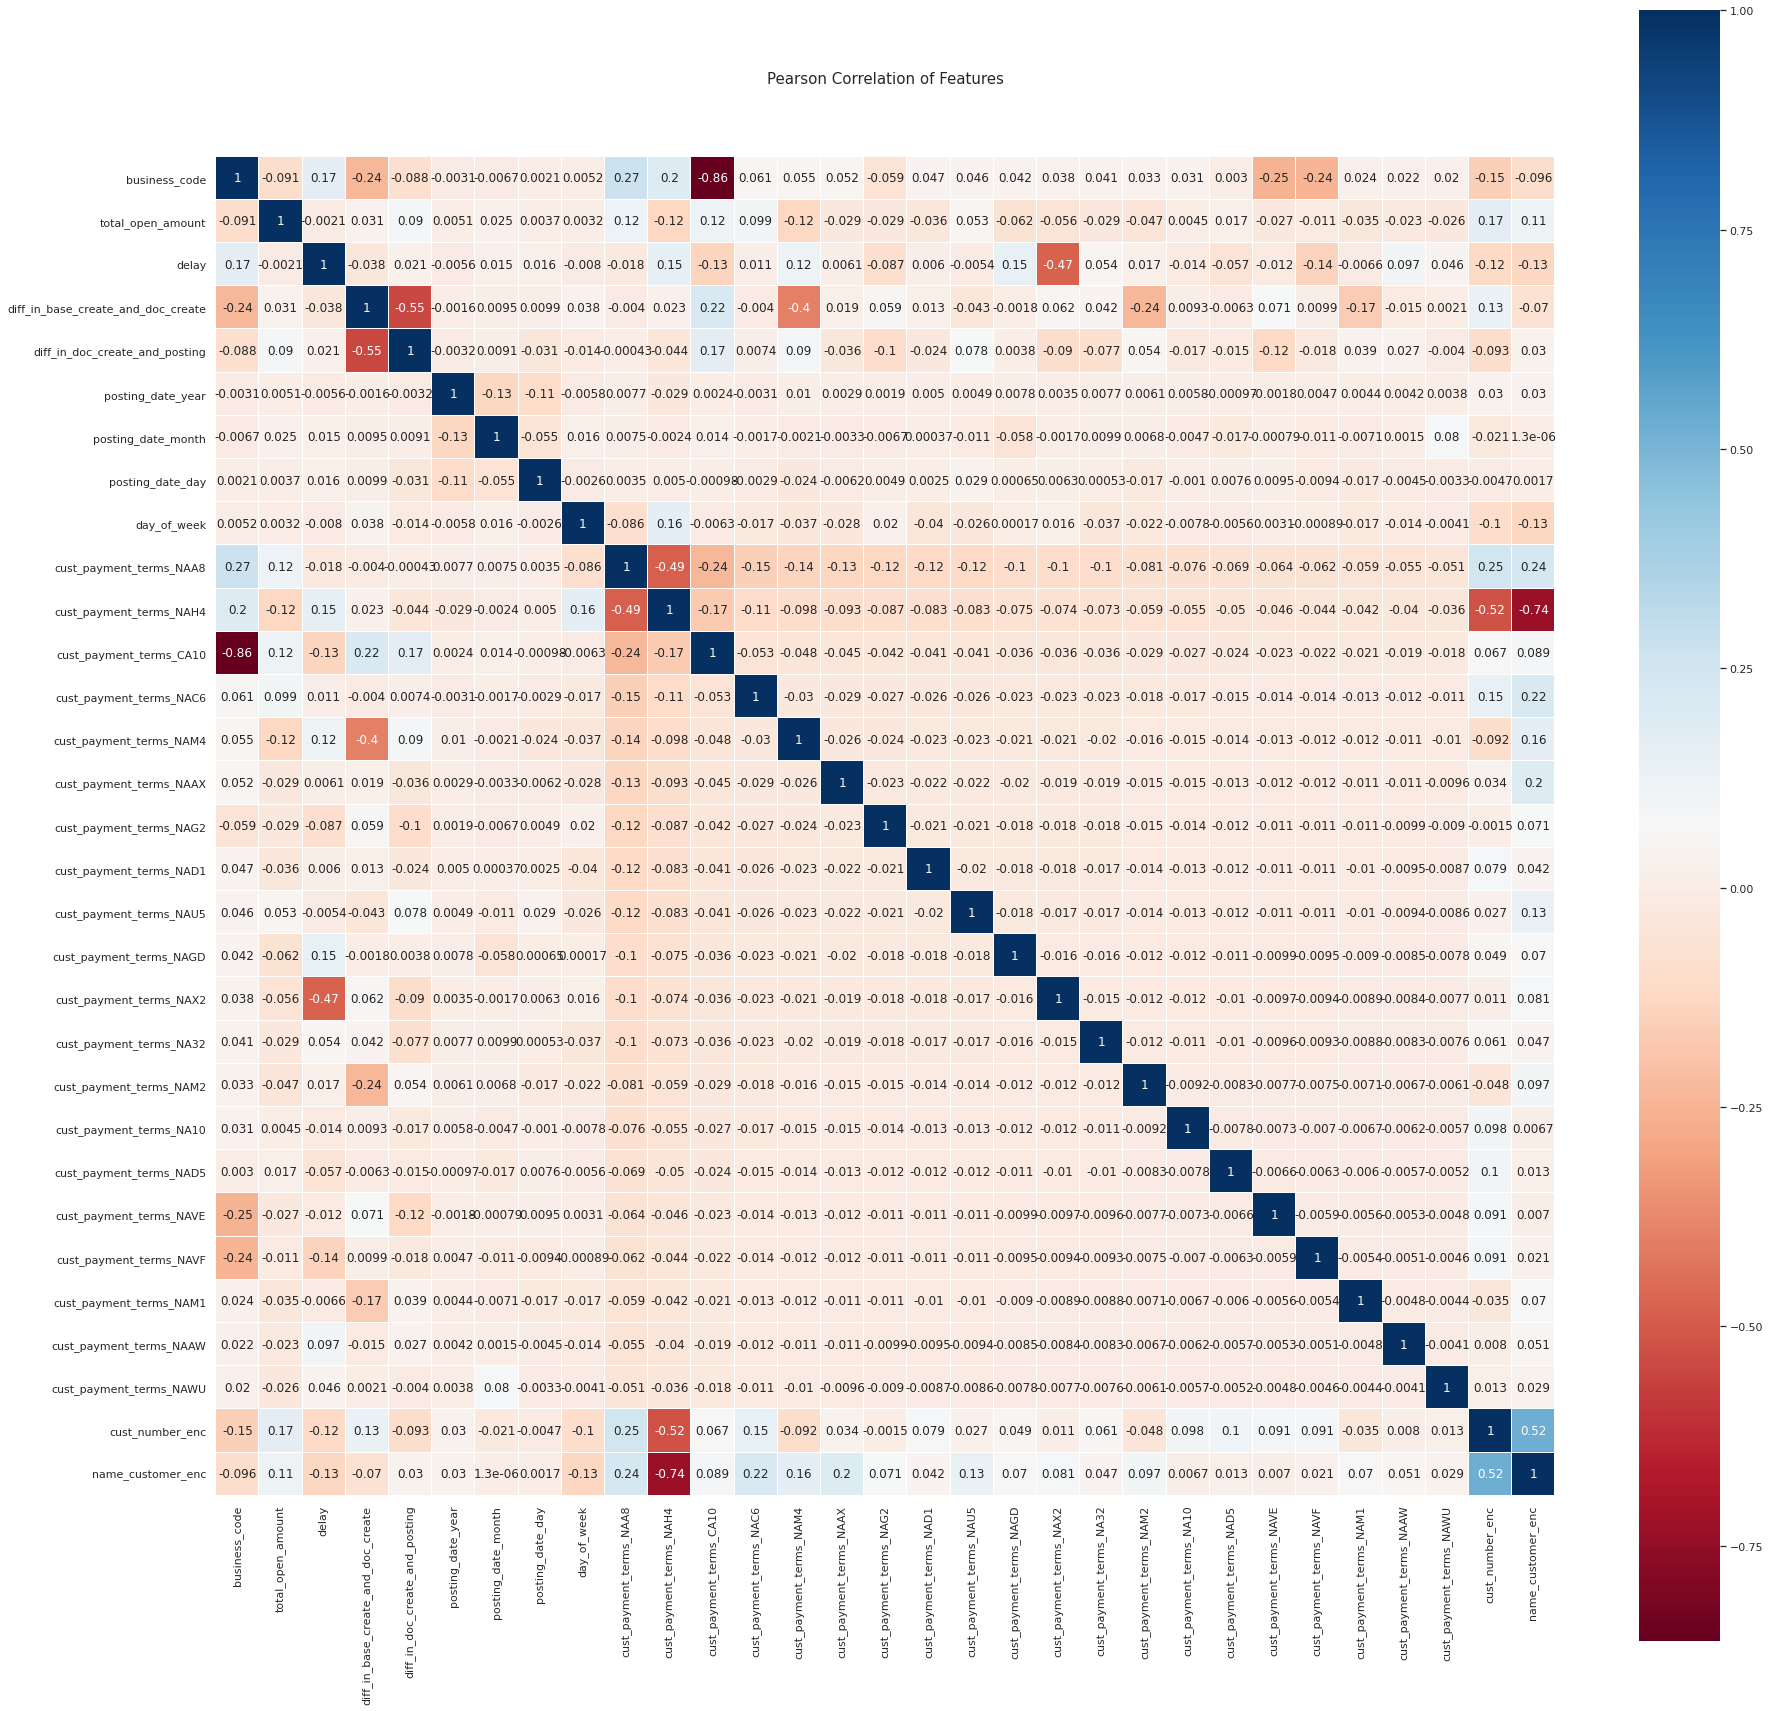

In [ ]:

#Feature Selection




colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

1. We can observe that are many correlations between the variables so we need to remove any of the feature which is highly correlated with the other features and is less correlated to target feature.
2. We can observe cust_payment_terms_NAH4 and cust_payment_terms_NAH4
3. we can also observe that there is correlation between diff_in_base_create_and_doc_create and diff_in_doc_create_and_posting,but diff_in_base_create_and_doc_create is more important for our target column so we will keep it and remove the other that is diff_in_doc_create_and_posting.

In [ ]:
X_train.columns

Index(['business_code', 'total_open_amount', 'delay',
       'diff_in_base_create_and_doc_create', 'diff_in_doc_create_and_posting',
       'posting_date_year', 'posting_date_month', 'posting_date_day',
       'day_of_week', 'cust_payment_terms_NAA8', 'cust_payment_terms_NAH4',
       'cust_payment_terms_CA10', 'cust_payment_terms_NAC6',
       'cust_payment_terms_NAM4', 'cust_payment_terms_NAAX',
       'cust_payment_terms_NAG2', 'cust_payment_terms_NAD1',
       'cust_payment_terms_NAU5', 'cust_payment_terms_NAGD',
       'cust_payment_terms_NAX2', 'cust_payment_terms_NA32',
       'cust_payment_terms_NAM2', 'cust_payment_terms_NA10',
       'cust_payment_terms_NAD5', 'cust_payment_terms_NAVE',
       'cust_payment_terms_NAVF', 'cust_payment_terms_NAM1',
       'cust_payment_terms_NAAW', 'cust_payment_terms_NAWU', 'cust_number_enc',
       'name_customer_enc'],
      dtype='object')

In [ ]:
X_train=X_train.drop('diff_in_doc_create_and_posting',axis=1)

#now dropped


X_train.head()

business_code  total_open_amount  delay  \
0          28197           11475.96     -3   
1          28197           36053.19     -8   
2          28197             152.79     -1   
3          28197           17507.51      0   
4          28197           41309.00      4   

   diff_in_base_create_and_doc_create  posting_date_year  posting_date_month  \
0                                   0               2018                  12   
1                                   0               2018                  12   
2                                   1               2018                  12   
3                                   1               2018                  12   
4                                   0               2018                  12   

   posting_date_day  day_of_week  cust_payment_terms_NAA8  \
0                30            6                        0   
1                30            6                        0   
2                30            6                        1   
3                30            6                        1   
4                30            6                        0   

   cust_payment_terms_NAH4  cust_payment_terms_CA10  cust_payment_terms_NAC6  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        1                        0                        0   

   cust_payment_terms_NAM4  cust_payment_terms_NAAX  cust_payment_terms_NAG2  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAD1  cust_payment_terms_NAU5  cust_payment_terms_NAGD  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAX2  cust_payment_terms_NA32  cust_payment_terms_NAM2  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NA10  cust_payment_terms_NAD5  cust_payment_terms_NAVE  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAVF  cust_payment_terms_NAM1  cust_payment_terms_NAAW  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                      

####<b>Looking for constant features and quasi-constant 

constant

In [ ]:
from sklearn.feature_selection import VarianceThreshold
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(X_train)
#the number of non-constant features.
len(X_train.columns[constant_filter.get_support()])

30

In [ ]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


quasi-constant

In [ ]:
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0.005)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(X_train)
#the number of non-constant features.
print(len(X_train.columns[constant_filter.get_support()]))
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))
constant_columns

27
3


['posting_date_year', 'cust_payment_terms_NAAW', 'cust_payment_terms_NAWU']

posting_date_year and 3 are behaving as quasi_constant so we will also make sure that they have less feature importance so that we can try to remove them.

####<b>Checking for duplicated_columns

In [ ]:
# transpose the feature matrice
X_train_T = X_train.T
# print the number of duplicated features
print(X_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = X_train_T[X_train_T.duplicated()].index.values
print(duplicated_columns)

0
[]


We can observe that there are no duplicated columns.

#### Embedding method for feature importance

In [ ]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
   
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(20).plot(kind='barh')  
    return final_df

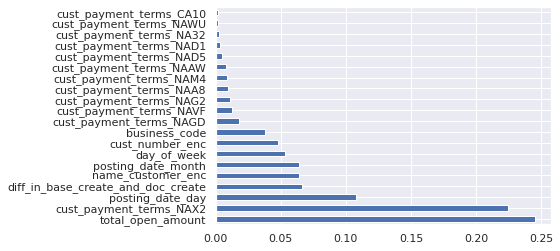

In [ ]:
feature_importance=tree_based_feature_importance(X_train.drop('delay',axis=1),X_train['delay'])

In [ ]:
display(feature_importance)

Features  Importances
1                    total_open_amount     0.245033
17             cust_payment_terms_NAX2     0.224527
5                     posting_date_day     0.108195
2   diff_in_base_create_and_doc_create     0.066031
28                   name_customer_enc     0.064164
4                   posting_date_month     0.063962
6                          day_of_week     0.053585
27                     cust_number_enc     0.048149
0                        business_code     0.038039
16             cust_payment_terms_NAGD     0.017589
23             cust_payment_terms_NAVF     0.012148
13             cust_payment_terms_NAG2     0.010725
7              cust_payment_terms_NAA8     0.009228
11             cust_payment_terms_NAM4     0.008711
25             cust_payment_terms_NAAW     0.007666
21             cust_payment_terms_NAD5     0.004730
14             cust_payment_terms_NAD1     0.003383
18             cust_payment_terms_NA32     0.002859
26             cust_payment_terms_NAWU     0.002120
9              cust_payment_terms_CA10     0.001972
22             cust_payment_terms_NAVE     0.001520
8              cust_payment_terms_NAH4     0.001260
20             cust_payment_terms_NA10     0.001147
10             cust_payment_terms_NAC6     0.000971
15             cust_payment_terms_NAU5     0.000932
12             cust_payment_terms_NAAX     0.000668
3                    posting_date_year     0.000305
24             cust_payment_terms_NAM1     0.000223
19             cust_payment_terms_NAM2     0.000159

In [ ]:
display(feature_importance.Features.values)

array(['total_open_amount', 'cust_payment_terms_NAX2', 'posting_date_day',
       'diff_in_base_create_and_doc_create', 'name_customer_enc',
       'posting_date_month', 'day_of_week', 'cust_number_enc',
       'business_code', 'cust_payment_terms_NAGD',
       'cust_payment_terms_NAVF', 'cust_payment_terms_NAG2',
       'cust_payment_terms_NAA8', 'cust_payment_terms_NAM4',
       'cust_payment_terms_NAAW', 'cust_payment_terms_NAD5',
       'cust_payment_terms_NAD1', 'cust_payment_terms_NA32',
       'cust_payment_terms_NAWU', 'cust_payment_terms_CA10',
       'cust_payment_terms_NAVE', 'cust_payment_terms_NAH4',
       'cust_payment_terms_NA10', 'cust_payment_terms_NAC6',
       'cust_payment_terms_NAU5', 'cust_payment_terms_NAAX',
       'posting_date_year', 'cust_payment_terms_NAM1',
       'cust_payment_terms_NAM2'], dtype=object)

We can observe that posting_date_year and 3 are not playing much importance so we can even try to remove it.But for now I am trying to keep it as the number of columns are not so high rather.

In [ ]:
 X_train=X_train.drop('business_code',axis=1)


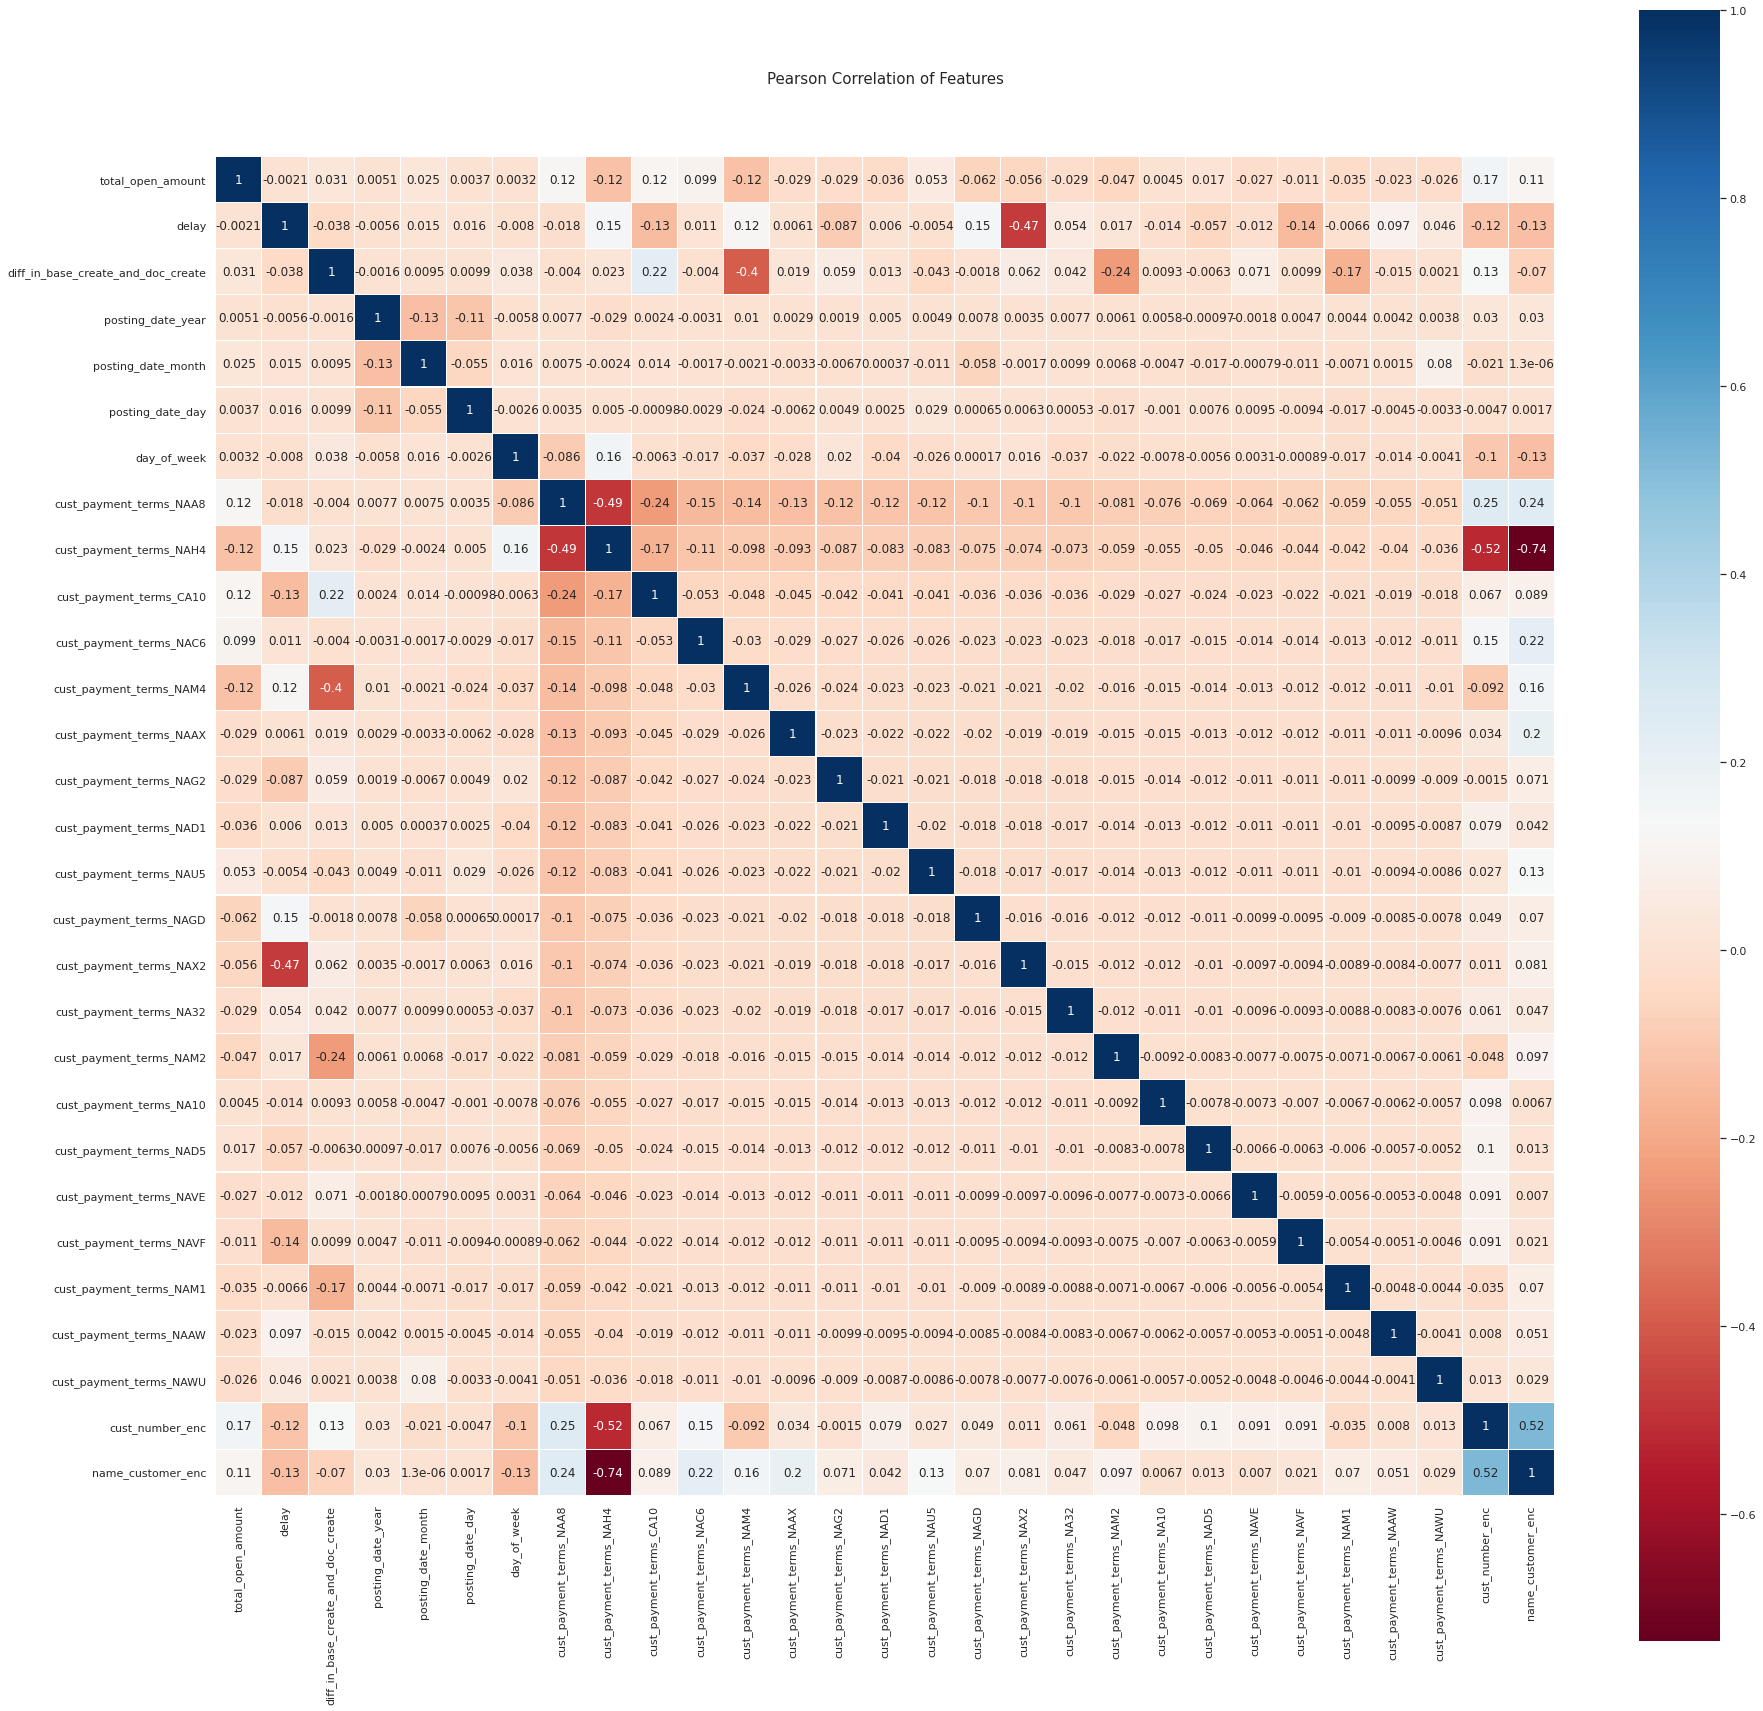

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
X_train.head()

total_open_amount  delay  diff_in_base_create_and_doc_create  \
0           11475.96     -3                                   0   
1           36053.19     -8                                   0   
2             152.79     -1                                   1   
3           17507.51      0                                   1   
4           41309.00      4                                   0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  \
0               2018                  12                30            6   
1               2018                  12                30            6   
2               2018                  12                30            6   
3               2018                  12                30            6   
4               2018                  12                30            6   

   cust_payment_terms_NAA8  cust_payment_terms_NAH4  cust_payment_terms_CA10  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   cust_payment_terms_NAC6  cust_payment_terms_NAM4  cust_payment_terms_NAAX  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAG2  cust_payment_terms_NAD1  cust_payment_terms_NAU5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAGD  cust_payment_terms_NAX2  cust_payment_terms_NA32  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAM2  cust_payment_terms_NA10  cust_payment_terms_NAD5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAVE  cust_payment_terms_NAVF  cust_payment_terms_NAM1  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAAW  cust_payment_terms_NAWU  cust_number_enc  \
0                        0                        0                1   
1                        0                        0                7   
2                        0                     

### <b>Create a function to repeat the steps on test_data and val_data

In [ ]:
def convert_test_or_val(X_train):
  # X_train=X_train.dropna(subset=['invoice_id'],axis=0)
  test_invoice_id=X_train['invoice_id']
  X_train=X_train.drop('invoice_id',axis=1)
  X_train.drop_duplicates(inplace=True,keep='last')
  X_train=X_train.sort_values(by = 'posting_date')
  X_train['clear_date']=pd.to_datetime(X_train['clear_date'])
  X_train['due_in_date'] = pd.to_datetime(X_train['due_in_date'], format='%Y%m%d')
  test_due_in_date=X_train['due_in_date']
  X_train['delay']=X_train['due_in_date']-X_train['clear_date']
  X_train['delay'] = pd.to_numeric(X_train['delay'].dt.days, downcast='integer')
  X_train=X_train.reset_index(drop=True)
  X_train=X_train.drop('clear_date',axis=1)
  X_train=X_train.drop('due_in_date',axis=1)
  X_train['posting_date']=pd.to_datetime(X_train['posting_date'])
  X_train['document_create_date'] = pd.to_datetime(X_train['document_create_date'], format='%Y%m%d')
  X_train['document_create_date.1'] = pd.to_datetime(X_train['document_create_date.1'], format='%Y%m%d')
  X_train['baseline_create_date'] = pd.to_datetime(X_train['baseline_create_date'], format='%Y%m%d')
  X_train['buisness_year'] = pd.to_datetime(X_train['buisness_year'], format='%Y').dt.year
  X_train=X_train.drop('document_create_date.1',axis=1)
  X_train=X_train.drop('doc_id',axis=1)
  X_train=X_train.drop('document type',axis=1)
  X_train=X_train.drop('buisness_year',axis=1)
  X_train=X_train.drop('posting_id',axis=1)
  X_train=X_train.drop('isOpen',axis=1)

  test_name_customer=X_train['name_customer'].copy()
  test_cust_number=X_train['cust_number'].copy()



  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : x<10].index),"one_digit_cust_number",X_train['cust_number'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=10,x<100))].index),"two_digit_cust_number",X_train['cust_number'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=100,x<200))].index),"from_100_to_200_cust_number",X_train['cust_number'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=200,x<300))].index),"from_200_to_300_cust_number",X_train['cust_number'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=300,x<400))].index),"from_300_to_400_cust_number",X_train['cust_number'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=400,x<600))].index),"from_400_to_600_cust_number",X_train['cust_number'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=600,x<700))].index),"from_600_to_700_cust_number",X_train['cust_number'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['cust_number'] = np.where(X_train['cust_number'].isin(X_train['cust_number'].value_counts().loc[lambda x : (np.logical_and(x>=700,x<900))].index),"from_700_to_900_cust_number",X_train['cust_number'])



  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=1,x<5))].index),"from_1_to_5_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=5,x<10))].index),"from_5_to_10_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=10,x<15))].index),"from_10_to_15_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=15,x<20))].index),"from_15_to_20_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=20,x<25))].index),"from_20_to_25_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=25,x<30))].index),"from_25_to_30_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=30,x<40))].index),"from_30_to_40_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=40,x<50))].index),"from_40_to_50_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=50,x<60))].index),"from_50_to_60_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=60,x<70))].index),"from_60_to_70_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=70,x<80))].index),"from_70_to_80_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=80,x<90))].index),"from_80_to_90_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=90,x<100))].index),"from_90_to_100_cust_name",X_train['name_customer'])

  # clubbing cust_payment_terms with mid occurance in dataset - to ensure model gets max information
  X_train['name_customer'] = np.where(X_train['name_customer'].isin(X_train['name_customer'].value_counts().loc[lambda x : (np.logical_and(x>=100,x<150))].index),"from_100_to_150_cust_name",X_train['name_customer'])



  # clubbing business_code with mid occurance in dataset - to ensure model gets max information
  X_train['business_code'] = np.where(X_train['business_code'].isin(['U002','U005','U007']),"other_business_code",X_train['business_code'])




  X_train['cust_number'] = X_train['cust_number'].astype('category')
  X_train['name_customer'] = X_train['name_customer'].astype('category')



  c = CurrencyRates()
  rate_val=c.get_rate('CAD', 'USD')

  exchange_rate = {'CAD': rate_val,'USD':1.0}
  X_train['total_open_amount'] = pd.to_numeric(X_train['total_open_amount']) * (X_train['invoice_currency'].map(exchange_rate)) 
  test_total_open_amount=X_train['total_open_amount']

  conv = {'CAD': 'USD','USD':'USD'}
  X_train['invoice_currency'] = (X_train['invoice_currency'].map(conv))
  X_train=X_train.drop('invoice_currency',axis=1)




  X_train['diff_in_base_create_and_doc_create']=X_train['baseline_create_date']-X_train['document_create_date']
  X_train['diff_in_base_create_and_doc_create'] = pd.to_numeric(X_train['diff_in_base_create_and_doc_create'].dt.days, downcast='integer')


  X_train['diff_in_doc_create_and_posting']=X_train['document_create_date']-X_train['posting_date']
  X_train['diff_in_doc_create_and_posting'] = pd.to_numeric(X_train['diff_in_doc_create_and_posting'].dt.days, downcast='integer')


  X_train=X_train.drop('document_create_date',axis=1)
  X_train=X_train.drop('baseline_create_date',axis=1)


  X_train['posting_date_year']=X_train['posting_date'].dt.year
  X_train['posting_date_year'] = pd.to_numeric(X_train['posting_date_year'], downcast='integer')


  X_train['posting_date_month']=X_train['posting_date'].dt.month
  X_train['posting_date_month'] = pd.to_numeric(X_train['posting_date_month'], downcast='integer')


  X_train['posting_date_day']=X_train['posting_date'].dt.day
  X_train['posting_date_day'] = pd.to_numeric(X_train['posting_date_day'], downcast='integer')

  X_train['day_of_week'] = X_train['posting_date'].dt.weekday 
  X_train['day_of_week'] = pd.to_numeric(X_train['day_of_week'], downcast='integer')


  X_train=X_train.drop('posting_date',axis=1)

#########################################################################################################################
#Encoding part

  X_train=X_train.drop('business_code',axis=1)


  X_train['cust_number_enc'] = cust_number_encoder.transform(X_train['cust_number'])##
  X_train=X_train.drop('cust_number',axis=1)##


  X_train['name_customer_enc'] = name_customer_encoder.transform(X_train['name_customer'])##
  X_train=X_train.drop('name_customer',axis=1)##


  # X_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])
  # X_train=X_train.drop('cust_payment_terms',axis=1)

  # df_frequency_map = X_train.cust_payment_terms.value_counts().to_dict()
  # X_train.cust_payment_terms = X_train.cust_payment_terms .map(df_frequency_map)
  for label in top_10_payment_terms:
    X_train[variable+'_'+label] = np.where(X_train['cust_payment_terms'] == label, 1,0)
  X_train=X_train.drop('cust_payment_terms',axis=1)


  X_train=X_train.drop('diff_in_doc_create_and_posting',axis=1)

  
  # X_train=X_train.drop([ 'cust_payment_terms_NAH4','cust_payment_terms_CA10'],axis=1)
  # X_train=X_train.drop('cust_number_enc',axis=1)
  return test_name_customer,test_cust_number,test_invoice_id,test_due_in_date,test_total_open_amount,X_train




<b>Convert X_cv

In [ ]:
cv_name_customer,cv_cust_number,cv_invoice_id,cv_due_in_date,cv_total_open_amount,X_cv=convert_test_or_val(X_cv)

X_cv.head()

total_open_amount  delay  diff_in_base_create_and_doc_create  \
0      166597.476533     -6                                   1   
1        3226.450000      4                                   1   
2       28317.820000      1                                  -1   
3       13542.260000      1                                   0   
4       14501.440000      0                                   2   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  \
0               2019                  11                18            0   
1               2019                  11                18            0   
2               2019                  11                18            0   
3               2019                  11                18            0   
4               2019                  11                18            0   

   cust_number_enc  name_customer_enc  cust_payment_terms_NAA8  \
0                9                 12                        0   
1                1                 11                        0   
2                1                 11                        0   
3                1                 11                        0   
4                9                 14                        1   

   cust_payment_terms_NAH4  cust_payment_terms_CA10  cust_payment_terms_NAC6  \
0                        0                        1                        0   
1                        1                        0                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAM4  cust_payment_terms_NAAX  cust_payment_terms_NAG2  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAD1  cust_payment_terms_NAU5  cust_payment_terms_NAGD  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAX2  cust_payment_terms_NA32  cust_payment_terms_NAM2  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NA10  cust_payment_terms_NAD5  cust_payment_terms_NAVE  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAVF  cust_payment_terms_NAM1  cust_payment_terms_NAAW  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0 

<B>Convert X_test

In [ ]:
test_name_customer,test_cust_number,test_invoice_id,test_due_in_date,test_total_open_amount,X_test=convert_test_or_val(X_test)
# X_test=X_test.drop('key_0',axis=1)
X_test.head()

total_open_amount  delay  diff_in_base_create_and_doc_create  \
0           49537.66      5                                   2   
1           23929.29    -57                                   4   
2            4951.47      0                                   2   
3           35994.29      2                                   0   
4            3441.79     -2                                   0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  \
0               2020                   1                13            0   
1               2020                   1                13            0   
2               2020                   1                14            1   
3               2020                   1                14            1   
4               2020                   1                14            1   

   cust_number_enc  name_customer_enc  cust_payment_terms_NAA8  \
0                1                 23                        0   
1                1                 21                        0   
2                9                 20                        1   
3                1                 11                        0   
4                9                 12                        1   

   cust_payment_terms_NAH4  cust_payment_terms_CA10  cust_payment_terms_NAC6  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        0                        0                        0   
3                        1                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAM4  cust_payment_terms_NAAX  cust_payment_terms_NAG2  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAD1  cust_payment_terms_NAU5  cust_payment_terms_NAGD  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAX2  cust_payment_terms_NA32  cust_payment_terms_NAM2  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NA10  cust_payment_terms_NAD5  cust_payment_terms_NAVE  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAVF  cust_payment_terms_NAM1  cust_payment_terms_NAAW  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0 

In [ ]:
X_train.head()

total_open_amount  delay  diff_in_base_create_and_doc_create  \
0           11475.96     -3                                   0   
1           36053.19     -8                                   0   
2             152.79     -1                                   1   
3           17507.51      0                                   1   
4           41309.00      4                                   0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  \
0               2018                  12                30            6   
1               2018                  12                30            6   
2               2018                  12                30            6   
3               2018                  12                30            6   
4               2018                  12                30            6   

   cust_payment_terms_NAA8  cust_payment_terms_NAH4  cust_payment_terms_CA10  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   cust_payment_terms_NAC6  cust_payment_terms_NAM4  cust_payment_terms_NAAX  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAG2  cust_payment_terms_NAD1  cust_payment_terms_NAU5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAGD  cust_payment_terms_NAX2  cust_payment_terms_NA32  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAM2  cust_payment_terms_NA10  cust_payment_terms_NAD5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAVE  cust_payment_terms_NAVF  cust_payment_terms_NAM1  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAAW  cust_payment_terms_NAWU  cust_number_enc  \
0                        0                        0                1   
1                        0                        0                7   
2                        0                     

In [ ]:
len(X_train.columns),len(X_cv.columns),len(X_test.columns)

(29, 29, 29)

### Modeling

<B>Decision_tree_regressor

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)
# regressor.fit(X_train.drop('delay',axis=1), X_train['delay'])


In [ ]:
# y_predict = regressor.predict(X_test.drop('delay',axis=1))

In [ ]:
# from sklearn.metrics import mean_squared_error

# mean_squared_error(X_test['delay'], y_predict, squared=False)

<b>Base Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train.drop('delay',axis=1), X_train['delay'])
y_predict = regr.predict(X_test.drop('delay',axis=1))
y_predict

array([ 2.59443389,  2.00886711, -4.34450214, ...,  1.86697527,
       -7.23565575,  1.86753895])

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X_test['delay'], y_predict, squared=False)

14.544513299807145

In [ ]:
met = pd.DataFrame(zip(np.round(y_predict).astype(int) , X_test['delay']),columns=['Predicted','Actuals'])

In [ ]:
met.head(10)

Predicted  Actuals
0          3        5
1          2      -57
2         -4        0
3          2        2
4         -8       -2
5         -7        0
6         -4        0
7          3        8
8        -49       -6
9        -35       -1

In [ ]:
regr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

<b>Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6, 30, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 12, 18, 24, 30, None], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


Using Time Series Split during Cross-Validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
rf = RandomForestRegressor()

#time_series_split
tscv = TimeSeriesSplit(n_splits=3)
# Random search of parameters, using 3 splits for time_series cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = tscv, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train.drop('delay',axis=1), X_train['delay'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 68.8min finished


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0...
                                 

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    mse=mean_squared_error(test_labels, predictions, squared=False)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Mean Squared Error: {:0.4f} degrees.'.format(mse))
    return predictions
    
    
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train.drop('delay',axis=1), X_train['delay'])
base_predictions= evaluate(base_model, X_cv.drop('delay',axis=1), X_cv['delay'])

best_random = rf_random.best_estimator_
random_search_predictions = evaluate(best_random, X_cv.drop('delay',axis=1),  X_cv['delay'])

# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 6.6128 degrees.
Mean Squared Error: 10.4506 degrees.
Model Performance
Average Error: 4.5436 degrees.
Mean Squared Error: 8.2372 degrees.


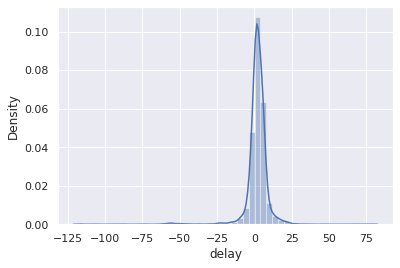

In [ ]:
sns.distplot(X_cv['delay']-random_search_predictions,kde=True)

<b>Final_model_with_best_hyperparameters

In [ ]:
# train with best parameters and then test on X_test
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(bootstrap= True,
                                  max_depth= 18,
                                  max_features= 'sqrt',
                                  min_samples_leaf= 3,
                                  min_samples_split= 10,
                                  n_estimators= 400)
regr.fit(X_train.drop('delay',axis=1), X_train['delay'])

y_predict_train = regr.predict(X_train.drop('delay',axis=1))
y_predict_cv = regr.predict(X_cv.drop('delay',axis=1))
y_predict_test = regr.predict(X_test.drop('delay',axis=1))


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_train['delay'], y_predict_train, squared=False)

7.710398171319282

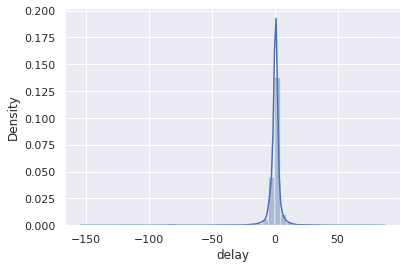

In [ ]:
sns.distplot(X_train['delay']-y_predict_train,kde=True)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_cv['delay'], y_predict_cv, squared=False)

8.325494461427299

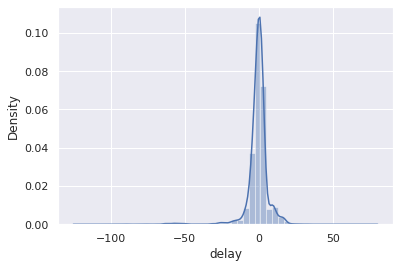

In [ ]:
sns.distplot(X_cv['delay']-y_predict_cv,kde=True)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test['delay'], y_predict_test, squared=False)

10.891302950057279

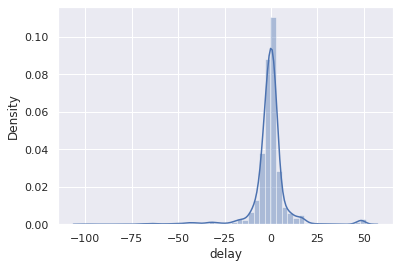

In [ ]:
sns.distplot(X_test['delay']-y_predict_test,kde=True)

In [ ]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(X_test['delay'], y_predict_test, squared=True)

In [ ]:
met = pd.DataFrame(zip(np.round(y_predict_test).astype(int) , X_test['delay']),columns=['Predicted','Actuals'])

In [ ]:
met.head(10)

Predicted  Actuals
0          3        5
1          2      -57
2          0        0
3          2        2
4          0       -2
5          0        0
6          1        0
7          3        8
8         -6       -6
9        -17       -1

In [ ]:
bins = [-200,-60,-30,-7,7,30,60,100]
labels = ['delays_above_2_month','delays_above_one_month','delay_within_a_month','acceptable_good_days','paid_earlier_under_one_month','paid_before_a_month','paid_too_early_before_2_month']

met['predicted_delay_category'] = pd.cut(met['Predicted'],bins,labels = labels)
met['actual_delay_category'] = pd.cut(met['Actuals'],bins,labels = labels)

In [ ]:
# met.head(20)
met['predicted_delay_category'].value_counts()

acceptable_good_days             3833
delay_within_a_month               77
paid_too_early_before_2_month       0
paid_before_a_month                 0
paid_earlier_under_one_month        0
delays_above_one_month              0
delays_above_2_month                0
Name: predicted_delay_category, dtype: int64

In [ ]:
met.head()

Predicted  Actuals predicted_delay_category   actual_delay_category
0          3        5     acceptable_good_days    acceptable_good_days
1          2      -57     acceptable_good_days  delays_above_one_month
2          0        0     acceptable_good_days    acceptable_good_days
3          2        2     acceptable_good_days    acceptable_good_days
4          0       -2     acceptable_good_days    acceptable_good_days

In [ ]:
met['actual_delay_category'].value_counts()

acceptable_good_days             3362
delay_within_a_month              225
paid_earlier_under_one_month      189
delays_above_one_month             68
paid_before_a_month                49
delays_above_2_month               17
paid_too_early_before_2_month       0
Name: actual_delay_category, dtype: int64

In [ ]:
count=0
for i in range(len(met)):
  if(met['predicted_delay_category'][i]==met['actual_delay_category'][i]):
    count=count+1
print(count)

3293


In [ ]:
len(met)

3910

In [ ]:
count/len(met)

0.8421994884910486

1. Sir If time would have permitted,I would have done the grid search on the similar vallues of random search to hyperparameter tune my model in more better way.
2. Time_series along with GridSearchCV for tuning the hyperparameter more as we got the insight range from RandomSearchCV so now we can try to manually check with the hyperparameter tuning similar to those values.

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor()
# tscv = TimeSeriesSplit(n_splits=3)
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = tscv, n_jobs = -1, verbose = 2)


In [ ]:
# grid_search.fit(train_features, train_labels)
# grid_search.best_params_

In [ ]:
# best_grid = grid_search.best_estimator_
# grid_accuracy = evaluate(best_grid, test_features, test_labels)

# # print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

<B>Xgboost

In [ ]:
# import xgboost as xgb
# regr =xgb.XGBRegressor()
# regr=regr.fit(X_train.drop('delay',axis=1), X_train['delay'])
# y_predict = regr.predict(X_test.drop('delay',axis=1))
# y_predict

In [ ]:
# from sklearn.metrics import mean_squared_error

# mean_squared_error(X_test['delay'], y_predict, squared=False)

In [ ]:
# regr.get_params()

Tuning xgboost

In [ ]:
#  #Randomized Search CV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# # Various learning rate parameters
# learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# # max_depth.append(None)
# #Subssample parameter values
# subsample=[0.7,0.6,0.8]
# # Minimum child weight parameters
# min_child_weight=[3,4,5,6,7]


# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'learning_rate': learning_rate,
#                'max_depth': max_depth,
#                'subsample': subsample,
#                'min_child_weight': min_child_weight}
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# regressor=xgb.XGBRegressor()
# # Random search of parameters, using 5 fold cross validation, 
# # search across 100 different combinations
# xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

# xg_random.fit(X_train,y_train)
# xg_random.best_params_

In [ ]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     mse=mean_squared_error(test_labels, predictions, squared=False)
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Mean Squared Error: {:0.4f} degrees.'.format(mse))
#     return predictions
    
    
# base_model = xgb.XGBRegressor(n_estimators = 10, random_state = 42)
# base_model.fit(X_train.drop('delay',axis=1), X_train['delay'])
# base_predictions= evaluate(base_model, X_val.drop('delay',axis=1), X_val['delay'])

# best_random = xg_random.best_estimator_
# random_search_predictions = evaluate(best_random, X_val.drop('delay',axis=1),  X_val['delay'])
# # evaluate(best_random, X_test.drop('delay',axis=1),  X_test['delay'])
# # print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
# met = pd.DataFrame(zip(y_predict.astype(int) , X_test['delay']),columns=['Predicted','Actuals'])

In [ ]:
# met['Predicted'].value_counts()

In [ ]:
# bins = [-200,-60,-30,-7,-3,0,3,7,30,60,100]
# labels = ['delays_above_2_month','delays_above_one_month','delay_within_a_month','delay_within_a_week','delay_within_3_days','paid_before_3_days','paid_before_one_week','paid_earlier_under_one_month','paid_before_a_month','paid_too_early_before_2_month']

# met['predicted_delay_category'] = pd.cut(met['Predicted'],bins,labels = labels)
# met['actual_delay_category'] = pd.cut(met['Actuals'],bins,labels = labels)

In [ ]:
# met=met.drop('predicted_delay_category',axis=1)
# met=met.drop('actual_delay_category',axis=1)

In [ ]:
# met.head(20)

<b> test_data</b><i>(original_test_data where we need to predict delay and calculate clear_date)

In [ ]:
fin_test_name_customer,fin_test_cust_number,fin_test_invoice_id,fin_test_due_in_date,fin_test_total_open_amount,fin_test_data=convert_test_or_val(test_data)
fin_test_data.head()

total_open_amount  delay  diff_in_base_create_and_doc_create  \
0           42937.19    NaN                                   2   
1            3270.04    NaN                                   0   
2           13042.11    NaN                                   2   
3           45113.38    NaN                                   0   
4           83092.30    NaN                                   0   

   posting_date_year  posting_date_month  posting_date_day  day_of_week  \
0               2020                   2                27            3   
1               2020                   2                27            3   
2               2020                   2                27            3   
3               2020                   2                27            3   
4               2020                   2                27            3   

   cust_number_enc  name_customer_enc  cust_payment_terms_NAA8  \
0                9                 14                        1   
1                1                  1                        0   
2                7                 18                        0   
3                9                 20                        1   
4                8                 14                        0   

   cust_payment_terms_NAH4  cust_payment_terms_CA10  cust_payment_terms_NAC6  \
0                        0                        0                        0   
1                        1                        0                        0   
2                        1                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAM4  cust_payment_terms_NAAX  cust_payment_terms_NAG2  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAD1  cust_payment_terms_NAU5  cust_payment_terms_NAGD  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        1                        0                        0   

   cust_payment_terms_NAX2  cust_payment_terms_NA32  cust_payment_terms_NAM2  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NA10  cust_payment_terms_NAD5  cust_payment_terms_NAVE  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   cust_payment_terms_NAVF  cust_payment_terms_NAM1  cust_payment_terms_NAAW  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0 

In [ ]:
y_predict = regr.predict(fin_test_data.drop('delay',axis=1))
y_predict

array([ 0.8198316 ,  1.51066539,  1.58837771, ..., -0.77604989,
       -1.58120371, -0.19498844])

In [ ]:
met1 = pd.DataFrame(zip(y_predict.astype(int) ),columns=['Predicted'])

In [ ]:
bins = [-200,-60,-30,-7,7,30,60,100]
labels = ['delays_above_2_month','delays_above_one_month','delay_within_a_month','acceptable_days','paid_earlier_under_one_month','paid_before_a_month','paid_too_early_before_2_month']

met1['predicted_delay_category'] = pd.cut(met1['Predicted'],bins,labels = labels)

In [ ]:
labels_aging = ['>60 delay','30-60 delay','7-30 delay','< 7 delay or inadvance','< 30 inadvance','30-60 inadvance','>60 inadvance']

met1['predicted_Aging_Bucket'] = pd.cut(met1['Predicted'],bins,labels = labels_aging)

In [ ]:
# met1=met1.drop('newdate',axis=1)
# met1.head(50)
# met1[met1['predicted_delay_category']=='delays_above_2_month']

In [ ]:
met1['predicted_delay_category'].value_counts()

acceptable_days                  9441
delay_within_a_month              260
paid_too_early_before_2_month       0
paid_before_a_month                 0
paid_earlier_under_one_month        0
delays_above_one_month              0
delays_above_2_month                0
Name: predicted_delay_category, dtype: int64

In [ ]:
met1.head()

Predicted predicted_delay_category  predicted_Aging_Bucket
0          0          acceptable_days  < 7 delay or inadvance
1          1          acceptable_days  < 7 delay or inadvance
2          1          acceptable_days  < 7 delay or inadvance
3          0          acceptable_days  < 7 delay or inadvance
4          5          acceptable_days  < 7 delay or inadvance

In [ ]:
met1.dtypes

Predicted                      int64
predicted_delay_category    category
predicted_Aging_Bucket      category
dtype: object

In [ ]:
met1['calculated_clear_date'] = pd.to_datetime(fin_test_due_in_date.values) + pd.to_timedelta(pd.np.round(met1['Predicted']), unit="D")

In [ ]:
len(test_due_in_date)

3910

In [ ]:
met1.head()

Predicted predicted_delay_category  predicted_Aging_Bucket  \
0          0          acceptable_days  < 7 delay or inadvance   
1          1          acceptable_days  < 7 delay or inadvance   
2          1          acceptable_days  < 7 delay or inadvance   
3          0          acceptable_days  < 7 delay or inadvance   
4          5          acceptable_days  < 7 delay or inadvance   

  calculated_clear_date  
0            2020-03-13  
1            2020-03-14  
2            2020-03-14  
3            2020-03-13  
4            2020-03-23

In [ ]:
# met1.head()
met1=met1.reset_index(drop=True)

In [ ]:
# pd.to_timedelta(pd.np.round(due_date), unit="D")+ met1['Predicted']

In [ ]:
# pd.to_datetime(met1['Predicted'])
calculated_clear_date=met1['calculated_clear_date']
predicted_delay_category=met1['predicted_delay_category']
Predicted_Aging_Bucket=met1['predicted_Aging_Bucket']

In [ ]:
fin_test_name_customer=fin_test_name_customer.reset_index(drop=True)
fin_test_cust_number=fin_test_cust_number.reset_index(drop=True)
fin_test_due_in_date=fin_test_due_in_date.reset_index(drop=True)
fin_test_invoice_id=fin_test_invoice_id.reset_index(drop=True)
fin_test_total_open_amount=fin_test_total_open_amount.reset_index(drop=True)
calculated_clear_date=calculated_clear_date.reset_index(drop=True)
predicted_delay_category=predicted_delay_category.reset_index(drop=True)

In [ ]:
z = {
  "Customer Name" :fin_test_name_customer,
  "Customer #": fin_test_cust_number,
  "Invoive #": fin_test_invoice_id,
  "Invoice Amount": fin_test_total_open_amount,
  "Due Date": fin_test_due_in_date,
  "Predicted Payment Date":calculated_clear_date,
  "Predicted Aging Bucket":Predicted_Aging_Bucket,
  "Notes":predicted_delay_category
}

In [ ]:
 z=pd.DataFrame(z)

In [ ]:
z.head()

Customer Name  Customer #     Invoive #  Invoice Amount   Due Date  \
0              CO llc  0200561861  1.930652e+09        42937.19 2020-03-13   
1  WAL-MAR associates  0200769623  1.930675e+09         3270.04 2020-03-13   
2          SA systems  0200759878  1.930578e+09        13042.11 2020-03-13   
3              HAR in  0200762950  1.930646e+09        45113.38 2020-03-13   
4      BAUGH SU trust  0200434439  1.930729e+09        83092.30 2020-03-18   

  Predicted Payment Date  Predicted Aging Bucket            Notes  
0             2020-03-13  < 7 delay or inadvance  acceptable_days  
1             2020-03-14  < 7 delay or inadvance  acceptable_days  
2             2020-03-14  < 7 delay or inadvance  acceptable_days  
3             2020-03-13  < 7 delay or inadvance  acceptable_days  
4             2020-03-23  < 7 delay or inadvance  acceptable_days

Importing the DataFrame as a CSV file

In [ ]:
z.to_csv("Original_Customer_data.csv",index=False)

In [ ]:
Z_smaller=z.head(1000)

In [ ]:
Z_smaller.head()

Customer Name  Customer #     Invoive #  Invoice Amount   Due Date  \
0              CO llc  0200561861  1.930652e+09        42937.19 2020-03-13   
1  WAL-MAR associates  0200769623  1.930675e+09         3270.04 2020-03-13   
2          SA systems  0200759878  1.930578e+09        13042.11 2020-03-13   
3              HAR in  0200762950  1.930646e+09        45113.38 2020-03-13   
4      BAUGH SU trust  0200434439  1.930729e+09        83092.30 2020-03-18   

  Predicted Payment Date  Predicted Aging Bucket            Notes  
0             2020-03-13  < 7 delay or inadvance  acceptable_days  
1             2020-03-14  < 7 delay or inadvance  acceptable_days  
2             2020-03-14  < 7 delay or inadvance  acceptable_days  
3             2020-03-13  < 7 delay or inadvance  acceptable_days  
4             2020-03-23  < 7 delay or inadvance  acceptable_days

In [ ]:
Z_smaller.to_csv("Sample_Customer_data.csv",index=False)

# Observations and Conclusions drawn

1. First of all while inspecting the data I observed that there is a column which is totally null so I removed the column.
2. There were also about 3 null values in the invoice_id column so I removed those rows even as the number was less and there is not much preference for imputing these as these were totally unique values over the entire column.
3. I even removed the duplicate rows that were present.
4. As this problem seems to be a time series problem, I tried to sort the rows depending on the posting_id then tried to do a train,test and validation split.
5. Also created my target column as delay by finding the difference between the due and the clear dates.
6. Converted the data into their determined datatypes
7. Removed the duplicate columns that i found in dates and unique_ids
8. Also removed the constant columns at this stage where the values were same in each row.
9. Also tried to do the exploratory data analysis to find which of the columns had a relation with the target feature and also look over to the outliers.
10. Also tries to map the features with more categories to a lesser one where i would find the the value_counts for some categories in features are quite less as compared to other.
11. Also tried to map the currency feature column and amount column.
12. Encoded the categorical features and also tried to draw the feature importance
13. Wrote a function to implement all the above over test and validatio sets even.
14. Also tried to use the base model of Random forest and other.
15. The performance of Random forest was better so tried to hypertune it along with the time series cross validation rather than the other.
16. Ran the model on the final best parameters.
17. Evaluated using the error metric and also predicted the delay on the final test data.
18. summed over the delay with due date to get the clear date and also tried to bin over the categories to get the values.